# Project description  
Analysing data on clients and their calls in the telecommunication company in order to provide recommendations to improve customer experience and loyalty for the customer service department.  
Goals:  
1) Find clients with non-optimal tariff plan   
2) Figure out how will change the company profit if they tariff plan will be changed to optimal  
3) Provide recommendations: suggest or not suggest switching to optimal plan   

### Table of Contents: <a class="anchor" id="contents"></a>

#### [1. Preparing environment and uploading data](#chapter1)
   * [1.1 Importing packages](#chapter2)
   * [1.2 Loading and optimizing datasets](#chapter3)
   
#### [2. Studying the general information](#chapter4)
   * [2.1 Studying the clients table](#chapter5)
   * [2.2 Studying the calls table](#chapter6)
   * [Conclusion](#chapter7)  
   
#### [3. Data preprocessing](#chapter8) 
   * [3.1 Preprocessing duplicates](#chapter9) 
   * [3.2 Preprocessing missing values](#chapter10) 
   * [3.3 Preprocessing abnormal values](#chapter43)
   * [3.4 Data type changing](#chapter11) 
   * [Conclusion](#chapter12)

#### [4. EDA](#chapter13)
   * [4.1 Studying clients behavior](#chapter14)
       * [Finding non active clients](#chapter15)
       * [Share of non active clients](#chapter16)
   * [4.2 Filtering data](#chapter17)   
   * [4.3 Merging tables](#chapter18)       
   * [4.4 Calculating revenue from each client](#chapter19)
       * [Calculating total revenue](#chapter20)
       * [Revenue by tariff plan](#chapter21)
       * [Revenue per month](#chapter22)
       * [Revenue per month by tariff plan](#chapter23)
       * [ARPU (total and for each plan)](#chapter24) 
   * [Conclusion](#chapter25)
       
#### [5. Finding optimal tariff plan for clients](#chapter30)
   * [5.1 When clients need another tariff plan?](#chapter31)
   * [5.2 Finding clients who overpay for tariff plan](#chapter32)
   * [5.3 Categorizing clients who overpay for tariff plan](#chapter33)
   * [5.4 Calculating revenue from clients with optimal tariff plan by category](#chapter34)
   * [5.5 Comparing revenues from each clients group](#chapter35)
   * [Conclusion](#chapter36)
       
#### [6. Testing Hypotheses](#chapter37)
   * [6.1 Formulating hypotheses](#chapter38)
   * [6.2 Choosing alpha level and criterion](#chapter39)
   * [6.3 Testing hypotheses](#chapter40)
   * [Conclusion](#chapter44)

#### [7. Presentation](#chapter41)
#### [8. Dashboard](#chapter42)

### 1.  Preparing environment and uploading data <a class="anchor" id="chapter1"></a>

#### 1.1 Importing packages <a class="anchor" id="chapter2"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math 
from datetime import datetime
from scipy import stats as st
from scipy.stats import mannwhitneyu

[Back to the Table of Contents](#contents)

#### 1.2 Loading and optimizing datasets <a class="anchor" id="chapter3"></a>

In [2]:
#saving path to the file into parameters
LOCAL_PATH_1 = 'test'
LOCAL_PATH_2 = 'test'

PLATFORM_PATH_1 = 'test'
PLATFORM_PATH_2 = 'test'
#reading cvs
try:
    df_clients = pd.read_csv(LOCAL_PATH_1, parse_dates=['date_start'])
    df_calls = pd.read_csv(LOCAL_PATH_2, parse_dates=['date'])
except:
    df_clients = pd.read_csv(PLATFORM_PATH_1, parse_dates=['date_start'])
    df_calls = pd.read_csv(PLATFORM_PATH_2, parse_dates=['date'])

Data sets were downloaded. I used parse_dates parameter (changes format to datetime in columns) for columns that contain information about date.  

We have 2 tables with data.  
- df_clients table contains information about clients current plan and regestration date (let's call it clients table);
- df_calls table contains information about calls and operator (let's call it calls table).

In [3]:
#cecking information about the clients table
df_clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 58.7 KB


Table isn't heavy, columns data type don't need some adjustment.

In [4]:
#cecking information about the calls table
df_calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

Table is quite heavy and columns data type need some adjustment.  
Let's study the general information about tables.

[Back to the Table of Contents](#contents)

### 2. Studying the general information <a class="anchor" id="chapter4"></a>

#### 2.1 Studying the clients table <a class="anchor" id="chapter5"></a>

In [5]:
#cecking the table
df_clients.head()
df_clients.tail()

,user_id,tariff_plan,date_start
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22
731,166565,B,2019-08-08


The clients table has the following columns:
- `user_id` - client's account ID;
- `tariff_plan` — client's current plan;
- `date_start` — client's registration date.

In [6]:
#checking information about the table
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


There are no missing values in columns, data types are correct.

In [7]:
print("First client's registration date:", df_clients.date_start.min())
print("Last client's registration date:", df_clients.date_start.max())

First client's registration date: 2019-08-01 00:00:00
Last client's registration date: 2019-10-31 00:00:00


In [8]:
print('Number of clients in clients table:', df_clients.user_id.nunique())

Number of clients in clients table: 732


In [9]:
#checking values in column
df_clients.describe(datetime_is_numeric=True)

,user_id,date_start
count,732.000000,732
mean,167431.927596,2019-09-14 16:39:20.655738368
min,166373.000000,2019-08-01 00:00:00
25%,166900.750000,2019-08-23 00:00:00
50%,167432.000000,2019-09-16 00:00:00
75%,167973.000000,2019-10-08 00:00:00
max,168606.000000,2019-10-31 00:00:00
std,633.810383,NaN


Values look ok. There are no zero values in columns.  

In [10]:
#creating function for future pie_charts
def pie_chart(data, column, title):
    data_pie_plan = data[column].value_counts()
    number = len(data_pie_plan)
    #building graph (pie chart)
    pie, ax = plt.subplots(figsize=[14,8])
    labels = data_pie_plan.keys()
    colors = ['#ff7675', '#0984e3', '#fdcb6e', '#00b894', '#fd79a8', '#a29bfe']
    plt.pie(x=data_pie_plan, autopct="%.1f%%",explode=[0.05]*number, labels=labels, pctdistance=0.5, 
            shadow=True, colors=colors, startangle=180, textprops={"fontsize":14})
    plt.title(title, fontsize=18, loc='left')
    plt.rcParams['font.size'] = 14
    ax.axis('equal')
    #plt.savefig('task1.png')
    plt.show()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64


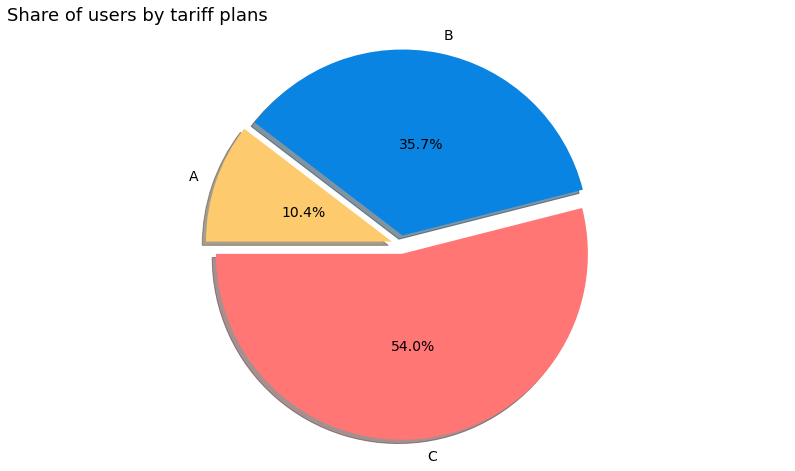

In [11]:
#checking values in column
print(df_clients.tariff_plan.value_counts())
#applying function
pie_chart(data=df_clients, column='tariff_plan', title='Share of users by tariff plans')

We have 3 tariff plans here.  
More than half users have tariff C, then tariff B and least users have tariff A.    

General information about tariff plans:  

`Basic price of plan A` — 5000  
`Basic price of plan B` — 2000   
`Basic price of plan C` — 1000  
`Incoming calls for all plans` — free  

`Internal calls for all plans` — a limit of 2000 free minutes per month, beyond which:  

Outgoing (internal) calls:  
`Plan A` — 0.1 units/minute  
`Plan B` — 0.15 units/minute  
`Plan C` — 0.3 units/minute  

Outgoing (not internal) calls:  
`Plan A` — 0.4 units/minute  
`Plan B` — 0.5 units/minute  
`Plan C` — 0.7 units/minute  

The client also pays 100 units for each operator (irrespective of plan).  

Let's save them into variables for future calculations.

In [12]:
#saving tariff plans details into variables
price_A = 5000
price_B = 2000
price_C = 1000
limit_calls = 2000
extra_int_calls_A = 0.1
extra_int_calls_B = 0.15
extra_int_calls_C = 0.3
no_int_calls_A = 0.4
no_int_calls_B = 0.5
no_int_calls_C = 0.7
operator_price = 100

In [13]:
#checking for duplicates in the table
print('Number of duplicates:', df_clients.duplicated().sum())

Number of duplicates: 0


There is no duplicates in this data set.  

[Back to the Table of Contents](#contents)

#### 2.2 Studying the calls table <a class="anchor" id="chapter6"></a>

In [14]:
#cecking the table
df_calls.head()
df_calls.tail()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,NaN,True,2,0,64


The clients table has the following columns:
- `user_id` — client account ID
- `date` — date the statistics were retrieved
- `direction` — call direction (`out` for outgoing, `in` for incoming)
- `internal` — whether the call was internal (between a client's operators)
- `operator_id` — operator identifier
- `is_missed_call` — whether the call was missed
- `calls_count` — number of calls
- `call_duration` — call duration (excluding waiting time)
- `total_call_duration` — call duration (including waiting time)

In [15]:
#checking information about the table
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

There are some missing values in columns `operator_id` and `internal`.  
Data type for columns `operator_id`, `internal` and `date` need to be changed. 

In [16]:
print('Number of clients in calls table:', df_calls.user_id.nunique())

Number of clients in calls table: 307


We have less clients in calls table than in user table.  
I assume that some of the clients didn't do any calls during considered period.

In [17]:
print('Number of calls:', df_calls.calls_count.sum())

Number of calls: 886755


In [18]:
print('Number of operators:', df_calls.operator_id.value_counts().count())

Number of operators: 1092


Let's find top 5 operators by number of calls:

In [19]:
#finding top 5 operators
df_calls.pivot_table(index = 'operator_id', values = 'calls_count',
                     aggfunc='sum').reset_index().sort_values('calls_count', ascending=False).head(5)

,operator_id,calls_count
28,885876.0,66049
29,885890.0,66016
583,929428.0,24572
551,925922.0,22210
317,908640.0,16699


Table shows top 5 operators by number of calls and their number of calls for considered period.

In [20]:
print("First date the statistics were retrieved:", df_calls.date.min())
print("Last date the statistics were retrieved:", df_calls.date.max())

First date the statistics were retrieved: 2019-08-02 00:00:00+03:00
Last date the statistics were retrieved: 2019-11-28 00:00:00+03:00


In [21]:
#checking values in column
df_calls.date.describe(datetime_is_numeric=True)

count                                  53902
mean     2019-10-23 01:00:32.191898880+03:00
min                2019-08-02 00:00:00+03:00
25%                2019-10-04 00:00:00+03:00
50%                2019-10-28 00:00:00+03:00
75%                2019-11-14 00:00:00+03:00
max                2019-11-28 00:00:00+03:00
Name: date, dtype: object

Column `date` contains date and time with indicate time zone (+3) and the time of the calls is not indicated, so we can keep only date here.  
Let's check random user to understand how calls were collected:

In [22]:
#finding user with more than one call in some day
df_calls.groupby(['user_id','date'])['call_duration'].count()
#selected thhis user and day
df_calls.query('user_id == 166377 & date ==  "2019-08-05 00:00:00+03:00"')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50


It seems that data is grouped by next fields: `user_id, date, direction, internal, operator_id, is_missed_call`. And for each group we have number of calls, total call duration and call duration.  

In [23]:
#creating function for future pie_charts
def pie_chart_1(data, column, value_1, value_2, title):
    a= data[data[column] == value_1]['calls_count'].sum()
    b= data[data[column] == value_2]['calls_count'].sum()
    data_pie_plan = [a,b]
    number = len(data_pie_plan)
    #building graph (pie chart)
    pie, ax = plt.subplots(figsize=[14,8])
    labels = [value_1, value_2]
    colors = ['#ff7675', '#0984e3', '#fdcb6e', '#00b894', '#fd79a8', '#a29bfe']
    plt.pie(x=data_pie_plan, autopct="%.1f%%",explode=[0.05]*number, labels=labels, pctdistance=0.5, 
            shadow=True, colors=colors, startangle=180, textprops={"fontsize":14})
    plt.title(title, fontsize=18, loc='left')
    plt.rcParams['font.size'] = 14
    ax.axis('equal')
    #plt.savefig('task1.png')
    plt.show()

out    31917
in     21985
Name: direction, dtype: int64


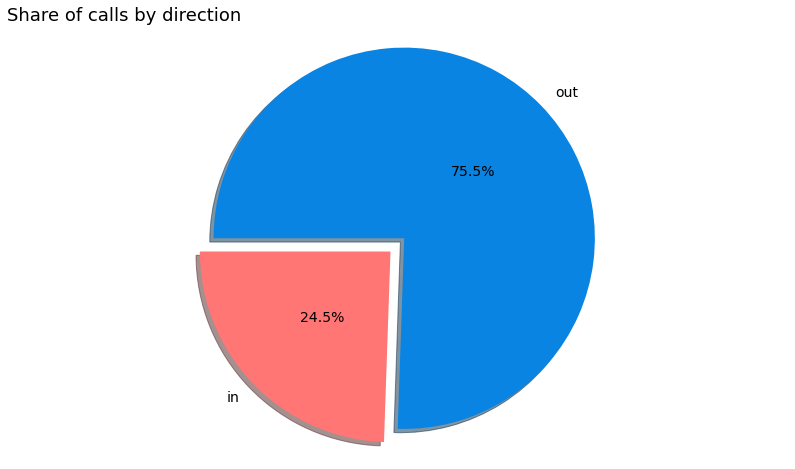

In [24]:
#checking values in column
print(df_calls.direction.value_counts())
#applying function to build graph
pie_chart_1(df_calls, 'direction', 'in', 'out', 'Share of calls by direction')

**in** means incoming call.  
**out** means outcoming call.  
In our dataset we have more outgoing calls than incoming.

False    47621
True      6164
Name: internal, dtype: int64


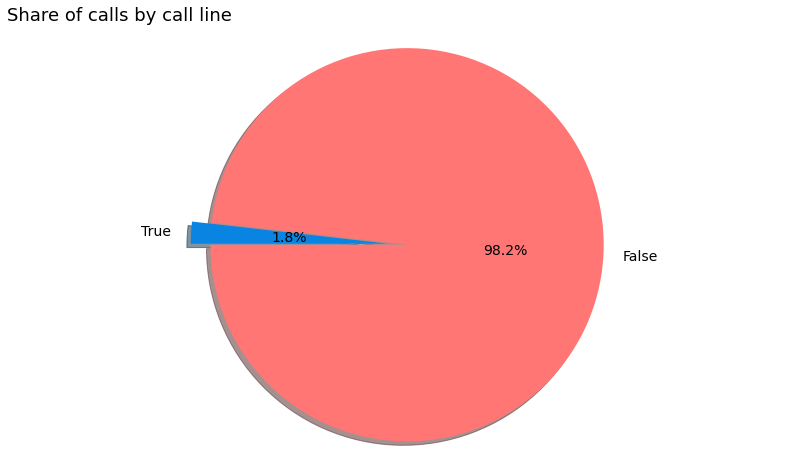

In [25]:
#checking values in column
print(df_calls.internal.value_counts())
#applying function to build graph
pie_chart_1(df_calls, 'internal', False, True, 'Share of calls by call line')

**False** means that call wasn't internal.  
**True** means that call was internal (between operators).  
We have less internal calls than not.    
We have boolean index (True/False) in this column, after preprocessing missing values we need to change data type to the appropriate (bool).  
Let's check missing values:

In [26]:
#calculating percentage of missing values
missing_list=[]
for x in df_calls:
    missing_list.append([x, df_calls[x].isnull().sum(),(len(df_calls[df_calls[x].isnull()])/len(df_calls))])
missing_list = pd.DataFrame(missing_list, columns=['column', 'amount_missing', 'missing %'])
missing_list.style.format({'missing %': "{:.2%}"}).hide_index()

column,amount_missing,missing %
user_id,0,0.00%
date,0,0.00%
direction,0,0.00%
internal,117,0.22%
operator_id,8172,15.16%
is_missed_call,0,0.00%
calls_count,0,0.00%
call_duration,0,0.00%
total_call_duration,0,0.00%


We have less than 1% missing values in column `internal` and 15% missing values in column `operator_id`.  
We need to find out what can be crucial for analysis and what we will do with these values.

In [27]:
#outputing 5 rows of the table with missing values in column 'operator_id'
df_calls[df_calls['operator_id'].isna()].sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
44192,168024,2019-11-02 00:00:00+03:00,in,False,NaN,True,1,0,2
17835,166958,2019-09-16 00:00:00+03:00,in,False,NaN,True,12,0,10
12619,166732,2019-10-16 00:00:00+03:00,in,False,NaN,True,1,0,50
35809,167545,2019-10-12 00:00:00+03:00,in,False,NaN,True,2,0,16
49819,168221,2019-11-05 00:00:00+03:00,out,False,NaN,True,1,0,12


NaN’s in operator_id means that calls were directly to somebody and no operators were used.  Therefore data is valid: you don’t need to fillna it or drop.  

In [28]:
#outputing 5 rows of the table with missing values in column 'internal'
df_calls[df_calls['internal'].isna()].sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37964,167650,2019-10-01 00:00:00+03:00,in,NaN,921318.0,False,1,124,131
43287,167977,2019-11-27 00:00:00+03:00,in,NaN,944220.0,False,1,144,177
24493,167110,2019-09-20 00:00:00+03:00,in,NaN,NaN,True,1,0,4
15093,166884,2019-09-17 00:00:00+03:00,in,NaN,NaN,True,21,0,9
29912,167264,2019-11-21 00:00:00+03:00,in,NaN,919552.0,False,1,55,80


On the firsl look there are no connection between missing values in column `internal` and other columns.  
Let's take a closer look and try to find any patterns to decide what can we do with missing values:

In [29]:
#saving data slice with missing values in variable
mis_internal = df_calls[df_calls['internal'].isna()].copy()

In [30]:
#creating a function for searching for patterns
def search_patterns(data):
    print(data.select_dtypes(np.number).describe())
    data_other_col = data.select_dtypes(['bool','object']).columns
    for col in data_other_col:
        print('')
        print(col)
        print(data[col].value_counts())

In [31]:
#applying a function
search_patterns(mis_internal)

             user_id    operator_id  calls_count  call_duration  \
count     117.000000      60.000000    117.00000     117.000000   
mean   167481.452991  921631.400000      2.00000      61.410256   
std       512.841484   17089.878219      3.99137     137.636650   
min    166405.000000  879898.000000      1.00000       0.000000   
25%    167110.000000  908739.000000      1.00000       0.000000   
50%    167626.000000  919790.000000      1.00000       2.000000   
75%    167852.000000  932798.000000      1.00000      78.000000   
max    168598.000000  958460.000000     36.00000     960.000000   

       total_call_duration  
count           117.000000  
mean             80.111111  
std             142.038835  
min               0.000000  
25%               8.000000  
50%              27.000000  
75%             104.000000  
max             973.000000  

direction
in     115
out      2
Name: direction, dtype: int64

internal
Series([], Name: internal, dtype: int64)

is_missed_call
False

We have 117 rows where we don't know if calls was internal or not, but 115 from 117 rows was with incoming calls and in this case  according our main goal it's not important if call was between operators or not, cause incoming calls are not affect to company profit (all incoming calls are free).  
We have interest in 2 rows with outcoming calls with missing values in column `internal`, let's look closer:

In [32]:
#selecting these calls
mis_internal.query('direction == "out"')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
21004,167016,2019-10-23 00:00:00+03:00,out,NaN,NaN,True,3,0,196
51367,168291,2019-11-28 00:00:00+03:00,out,NaN,NaN,True,3,0,93


We can see that these calls were missing, so again it's not really important for us if there are missing values or not in column `internal`, since there is zero call duration client doesn't pay for this call.  
So it doesn't affect to analysis, how I will fill missing values here. Since I want to change data type in this column to bollean index (bool) I will fill missing values with "False", again it will not affect to results at all.

False    30334
True     23568
Name: is_missed_call, dtype: int64


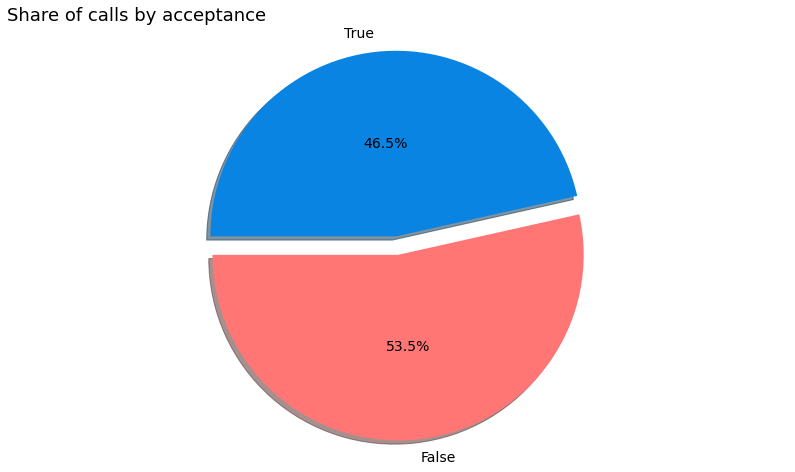

In [33]:
#checking values in column
print(df_calls.is_missed_call.value_counts())
pie_chart_1(df_calls, 'is_missed_call', False, True, 'Share of calls by acceptance')

**False** means that call was accepted.  
**True** means that call was missed.  
We have more accepted calls than missing here.

In [34]:
#checking values in column
df_calls.describe(datetime_is_numeric=True)

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


`operator_id` column:  
Values in this column have decimal format with zeros in decimal places, but looks like operator identifier is integer number, therefore data type can be changed to int(integer numbers).  

`calls_count` column:
- number of calls range from 1 to 4817 calls;
- mean number of calls is 16, but standart deviation is almost 4 times more than mean, it means that there are a huge outliers; 
- median is 4 calls.

`call_duration` column:
- call duration range from 0 to 144359 seconds;
- mean call duration is 867 seconds, but standart deviation is almost 4 times more than mean, it means that there are a huge outliers; 
- median is 38 seconds.  

`total_call_duration` column:  
- total call duration range from 0 to 166155 seconds;
- mean total call duration is 1157 seconds, but standart deviation is almost 4 times more than mean, it means that there are a huge outliers; 
- median is 210 seconds.

Let's check correlation for all columns and distribution of number of calls and call duration:

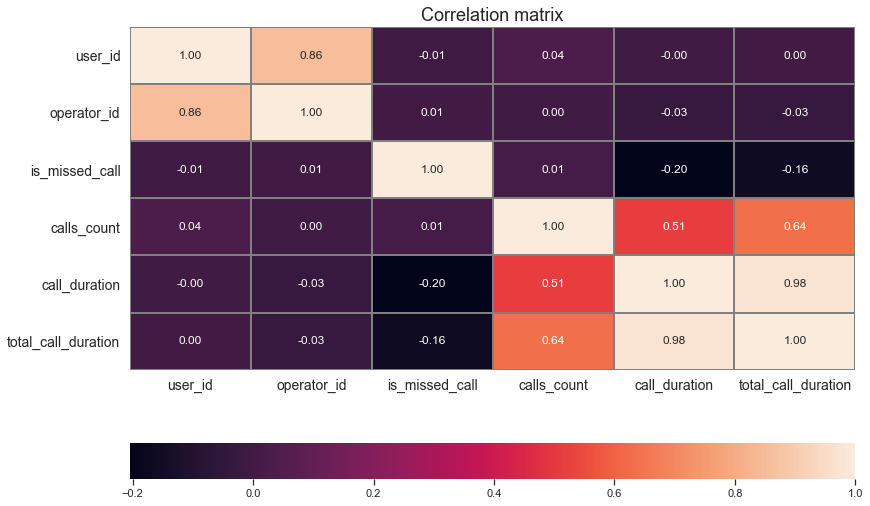

In [35]:
#checkin correlation
#building a correlation matrix
cm = df_calls.corr()
#making a heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Correlation matrix', fontsize = 18)
sns.heatmap(cm, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cbar_kws={"orientation": "horizontal"})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Graph shows that we have strong correlation between 4 columns: 
- `call_duration` and `total_call_duration` - correlation rate is 0.98 (what obviously, because than longer call duration that longer total call duration, it would be wierd if it were not so); 
- `operator_id` and `user_id` - correlation rate is 0.86. It means that our users usually use same operators for calls.

Also there is not very strong correlation between number of calls and call duration/total call duration, correlation rate is 0.51 and 0.64. It means that than bigger number of calls that longer call duration/total call duration, but it is not always.

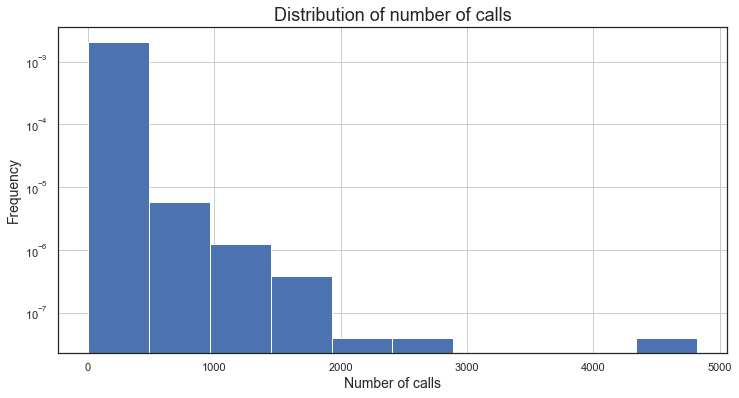


Skewness coefficient: 21.02
Variance: 3958.50



In [36]:
#checking distribution
df_calls.calls_count.hist(density=True, log=True, figsize=[12,6])
plt.xlabel('Number of calls', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of number of calls', fontsize=18)
plt.show()
print()
print('Skewness coefficient: {:.2f}'.format(df_calls.calls_count.skew()))
print( 'Variance: {:.2f}'.format(np.var(df_calls.calls_count)))
print()

Most of the clients do less than 1000 calls, but we have some clients with more than 1500 calls.  
Let's take a closer look on these clients:

In [37]:
#selecting clients with more than 1500 calls
more_1500_calls = df_calls.query('calls_count > 1500').copy()

All these calls were missed, so it will not affect to analysis.

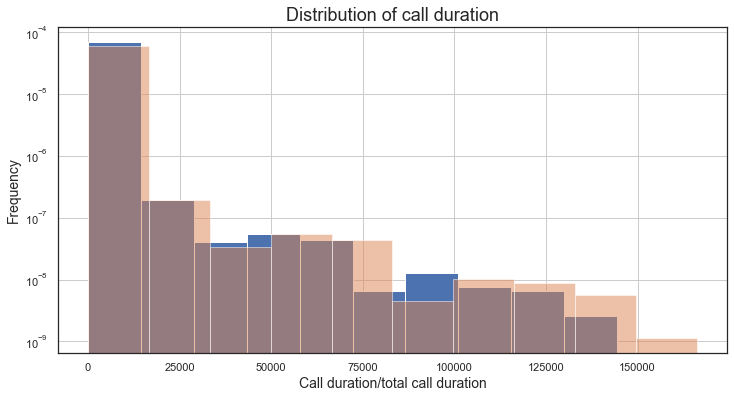


Calls duration
Skewness coefficient: 17.23
Variance: 13926007.21

Total calls duration
Skewness coefficient: 16.46
Variance: 19390177.41



In [38]:
#checking distribution
df_calls.call_duration.hist(density=True, log=True, figsize=[12,6])
df_calls.total_call_duration.hist(density=True, log=True, alpha=0.5, figsize=[12,6])
plt.xlabel('Call duration/total call duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of call duration', fontsize=18)
plt.show()
print()
print('Calls duration')
print('Skewness coefficient: {:.2f}'.format(df_calls.call_duration.skew()))
print( 'Variance: {:.2f}'.format(np.var(df_calls.call_duration)))
print()
print('Total calls duration')
print('Skewness coefficient: {:.2f}'.format(df_calls.total_call_duration.skew()))
print( 'Variance: {:.2f}'.format(np.var(df_calls.total_call_duration)))
print()

Distribution of calls duration and total calls duration look almost same, just total call duration is a bit longer.   
Most of the clients have call duration less than 100000 seconds.  
Let's take a closer look on clients with call duration longer than 100000 seconds:

In [39]:
#selecting clients with call duration more than 100000 seconds
df_calls.query('call_duration > 100000')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6769,166582,2019-09-05 00:00:00+03:00,out,False,885876.0,False,602,109032,120064
6808,166582,2019-09-09 00:00:00+03:00,out,False,885876.0,False,1138,121093,141930
6825,166582,2019-09-11 00:00:00+03:00,out,False,885876.0,False,946,115057,132708
6833,166582,2019-09-12 00:00:00+03:00,out,False,885876.0,False,696,125286,138643
6874,166582,2019-09-17 00:00:00+03:00,out,False,885876.0,False,1375,100454,124787
6889,166582,2019-09-18 00:00:00+03:00,out,False,885876.0,False,1013,121664,140050
6891,166582,2019-09-19 00:00:00+03:00,out,False,885876.0,False,673,108207,120596
6902,166582,2019-09-20 00:00:00+03:00,out,False,885876.0,False,737,114463,127868
6923,166582,2019-09-23 00:00:00+03:00,out,False,885876.0,False,1436,103526,129484
6946,166582,2019-09-25 00:00:00+03:00,out,False,885876.0,False,1230,144395,166155


Everything look fine for our user 166582, in average each call took 3 minutes, high number of calls means long call duration.

In [40]:
#checking for duplicates in the table
print('Number of duplicates:', df_calls.duplicated().sum())

Number of duplicates: 4900


There is 4900 duplicated rows that need to be deleted. I assume that it was system mistake and some calls were counted more than once.

And in the end let's check if we have abnormal values as: 
- missed calls with no zero duration or accepted calls with zero duration; 
- total call duration shorter than call duration.

In [41]:
#creating a function for checking abnormal values
def anomaly_check(row):
    missed = row['is_missed_call']
    duration = row['call_duration']
    total_duration = row['total_call_duration']
    if (missed == True) and (duration > 0):
        return('ABNORMAL MISSED')
    elif (missed) == False and (duration <= 0):
        return('ABNORMAL ACCSEPTED')
    elif total_duration < duration:
        return('ABNORMAL DURATION')
        
df_calls['check'] = df_calls.apply(anomaly_check, axis=1)

In [42]:
print('Number of rows with missed calls but not zero duration:', 
      df_calls.query('check == "ABNORMAL MISSED"')['calls_count'].count())
print('Number of rows with accepted calls but zero duration:', 
      df_calls.query('check == "ABNORMAL ACCSEPTED"')['calls_count'].count())
print('Number of rows with total call duration shorter than call duration:', 
      df_calls.query('check == "ABNORMAL DURATION"')['calls_count'].count())

Number of rows with missed calls but not zero duration: 325
Number of rows with accepted calls but zero duration: 20
Number of rows with total call duration shorter than call duration: 0


We have 345 rows with abnormal values.  
Probably there is a system error and we need to replace values with correct.  
What we will consider as correct value? 
- if call have duration it can't consider as missed call;
- if call have zero duration it is missed call.

I will replace boolean index in column `is_missed_call` with correct for abnormal cases.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter7"></a>

Data was studied.  
**General information:**  
Clients:
- Number of clients in clients table: 732
- First client's registration date: 2019-08-01
- Last client's registration date: 2019-10-31
- 54% of clients have tariff C, 35.7% tariff B and 10.4% tariff A.

Calls:
- Number of clients in calls table: 307
- Number of calls: 886755
- Number of operators in the data set: 1092
- First date the statistics were retrieved: 2019-08-02
- Last date the statistics were retrieved: 2019-11-28
- 75.5% of calls were incoming, 24.5% were outcoming
- 98.2% of calls of calls were not internal, 1.8% were between operators
- 46.5% of calls were missed, 46.5% were accepted.

**I found:**
- missing values that need to be filled;
- data type that need to be changed;
- abnormal values than need to be replaced;
- duplicated rows that need to be deleted.

[Back to the Table of Contents](#contents)

### 3. Data preprocessing <a class="anchor" id="chapter8"></a>

#### 3.1 Preprocessing duplicates <a class="anchor" id="chapter9"></a>

On the previous step I found that the table `df_calls` have 4900 duplicated rows that need to be deleted:

In [43]:
#deleting duplicates
df_calls.drop_duplicates(inplace=True)
#checking result
print('Number of duplicates:', df_calls.duplicated().sum())

Number of duplicates: 0


Duplicates were deleted. Let's check how number of calls changed after that:

In [44]:
print('Number of calls:', df_calls.calls_count.sum())

Number of calls: 806709


Number of calls was: 886755 and now number of calls is 806709. 

[Back to the Table of Contents](#contents)

#### 3.2 Preprocessing missing values <a class="anchor" id="chapter10"></a>

On the previous step I decided to fill missing values in column `internal` with False:

In [45]:
#filling missing values
df_calls.internal = df_calls.internal.fillna(False)
#checking result
print('Number of missinv values in the column internal after filling:', df_calls.internal.isnull().sum())

Number of missinv values in the column internal after filling: 0


Missing values were filled.

[Back to the Table of Contents](#contents)

#### 3.3 Preprocessing abnormal values <a class="anchor" id="chapter43"></a>

On the previous step I found 345 rows with abnormal values. Let's replace values with correct:

In [46]:
#replacing abnormal values
mask_condition = ((df_calls['is_missed_call'] == True)&(df_calls['call_duration'] > 0)) #condition for mask() method
df_calls['is_missed_call'] = df_calls['is_missed_call'].mask(mask_condition, False)

mask_condition = ((df_calls['is_missed_call'] == False)&(df_calls['call_duration'] <= 0)) #condition for mask() method
df_calls['is_missed_call'] = df_calls['is_missed_call'].mask(mask_condition, True)

Abnormal values were replaced, we need to check result:

In [47]:
df_calls['check_2'] = df_calls.apply(anomaly_check, axis=1)

In [48]:
print('Number of rows with missed calls but not zero duration:', 
      df_calls.query('check_2 == "ABNORMAL MISSED"')['calls_count'].count())
print('Number of rows with accepted calls but zero duration:', 
      df_calls.query('check_2 == "ABNORMAL ACCSEPTED"')['calls_count'].count())

Number of rows with missed calls but not zero duration: 0
Number of rows with accepted calls but zero duration: 0


Abnormal values were replaced. I will delete helper columns:

In [49]:
#deleting helper column
df_calls = df_calls.drop(columns=['check', 'check_2'])
#checking result
df_calls.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
48668,168187,2019-11-13 00:00:00+03:00,out,False,937782.0,True,2,0,80


[Back to the Table of Contents](#contents)

#### 3.4 Data type changing <a class="anchor" id="chapter11"></a>

In [50]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              49002 non-null  int64                                
 1   date                 49002 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            49002 non-null  object                               
 3   internal             49002 non-null  bool                                 
 4   operator_id          41546 non-null  float64                              
 5   is_missed_call       49002 non-null  bool                                 
 6   calls_count          49002 non-null  int64                                
 7   call_duration        49002 non-null  int64                                
 8   total_call_duration  49002 non-null  int64                                
dtypes: bool

On the previous step I decided to change data type for columns `operator_id`, `internal` and `date` need to be changed.  
After filling missing values column `internal` become with correct data type (bool).  
Since I decided to keep NaN values in column `operator_id` I will keep data type too.
Let's change `date` column data type:

In [51]:
#changing data type
df_calls['date'] = df_calls['date'].dt.date
df_calls.date = pd.to_datetime(df_calls.date)
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             49002 non-null  bool          
 4   operator_id          41546 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.1+ MB


Data type were changed.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter12"></a>

In this step:
- duplicates were deleted;
- missing values were filled;
- abnormal values were replaced;
- data type that need to be changed.

[Back to the Table of Contents](#contents)

### 4. EDA <a class="anchor" id="chapter13"></a>

#### 4.1 Studying clients behavior <a class="anchor" id="chapter14"></a>

Before I will find non active users I want to create helper column with month separate from date:

In [52]:
#creating columns
df_calls['month'] = df_calls['date'].dt.month

In [53]:
#checking result
df_calls.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
11797,166708,2019-11-06,out,False,899082.0,False,17,392,683,11


#### Finding non active clients <a class="anchor" id="chapter15"></a>

Who is non active clients?  
Clients who didn't do or get any calls during month. 
We didn't have zero calls before preprosessing in column `calls_count`, it means that in `df_calls` table we have only active users.  
Let's check it again just in case:

In [54]:
#calculating number of calls for each clients by month
non_active = df_calls.groupby(['user_id', 'month']).agg({'calls_count':'sum'}).reset_index()
#renaming columns
non_active.columns = ['user_id', 'month', 'sum_calls']
#check number of non active users in df_calls table
print('Number of non active clients in df_calls table:', non_active.query('sum_calls == 0')['user_id'].count())

Number of non active clients in df_calls table: 0


Look like in the table `df_calls` we can find only active clients, but remember that number of clients in `df_clients` table were greather than here.

In [55]:
print('Number of clients in clients table:', df_clients.user_id.nunique())
print('Number of clients in calls table:', df_calls.user_id.nunique())

Number of clients in clients table: 732
Number of clients in calls table: 307


Since we have all information on our clients calls in `df_calls` we have 425 clients who didn't get/do any calls.   
I assume they are our non active clients.  
Let's check information about them:

In [56]:
#saving user id of active clients into peremeter
active_users_id = df_calls.user_id.unique()
#selectin non active clients
non_active_users = df_clients.query('user_id not in @active_users_id').copy()
#chhecking result
print('Number of non active clients:', len(non_active_users))

Number of non active clients: 425


In [57]:
print("First client's registration date:", non_active_users.date_start.min())
print("Last client's registration date:", non_active_users.date_start.max())

First client's registration date: 2019-08-01 00:00:00
Last client's registration date: 2019-10-31 00:00:00


Registrations dates is the same as for all clients.

C    234
B    149
A     42
Name: tariff_plan, dtype: int64


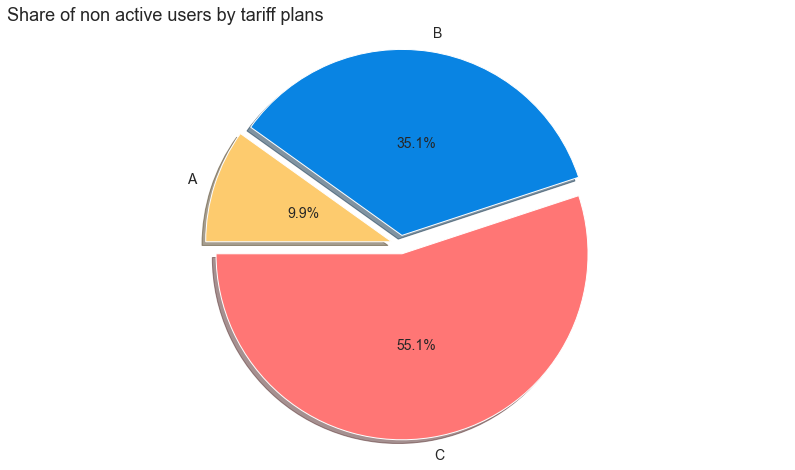

In [58]:
#checking values in column
print(non_active_users.tariff_plan.value_counts())
#applying function
pie_chart(data=non_active_users, column='tariff_plan', title='Share of non active users by tariff plans')

Proportions of clients by tariff plans also looks same.  
We have more users with tariff C in general, then with B and A.  

[Back to the Table of Contents](#contents)

#### Share of non active clients <a class="anchor" id="chapter16"></a>

In [59]:
#calculating churn rate
total_users = df_clients.user_id.nunique()
n_non_active_users = df_clients.query('user_id not in @active_users_id')['user_id'].count()
share = n_non_active_users/total_users
print('Share of non active clients: {:.2%}'.format(share))

Share of non active clients: 58.06%


Let's find share of non active clients for each tariff plan:

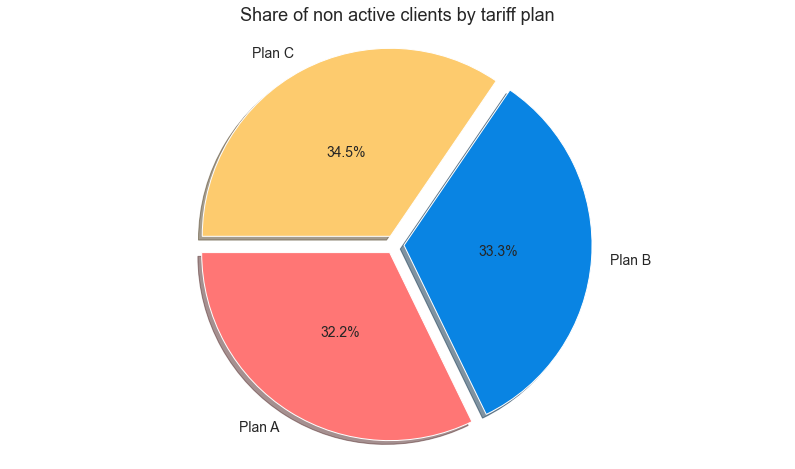

In [60]:
a= len(non_active_users.query('tariff_plan == "A"'))/len(df_clients.query('tariff_plan == "A"'))
b= len(non_active_users.query('tariff_plan == "B"'))/len(df_clients.query('tariff_plan == "B"'))
c = len(non_active_users.query('tariff_plan == "C"'))/len(df_clients.query('tariff_plan == "C"'))
data_pie_plan = [a,b,c]
number = len(data_pie_plan)
#building graph (pie chart)
pie, ax = plt.subplots(figsize=[14,8])
labels = ['Plan A', 'Plan B', 'Plan C']
colors = ['#ff7675', '#0984e3', '#fdcb6e', '#00b894', '#fd79a8', '#a29bfe']
plt.pie(x=data_pie_plan, autopct="%.1f%%",explode=[0.05]*number, labels=labels, pctdistance=0.5, 
        shadow=True, colors=colors, startangle=180, textprops={"fontsize":14})
plt.title("Share of non active clients by tariff plan", fontsize=18)
plt.rcParams['font.size'] = 14
ax.axis('equal')
#plt.savefig('task1.png')
plt.show()

As we can see on the graph share of non active clients almost equal for each tariff plan.  
I don't see any special regularity here.  
Also we don't have informations of calls for non active clients, therefore I can't really say or find any patterns why clients become non active.

[Back to the Table of Contents](#contents)

#### 4.2 Filtering data <a class="anchor" id="chapter17"></a>

I will work with active users only, let's create a table with active users only and check general information about them:

In [61]:
#selecting active users
active_users = df_clients.query('user_id in @active_users_id').copy()
active_users.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
4,168193,A,2019-10-16
7,168252,A,2019-10-17
16,168253,A,2019-10-18


In [62]:
print("First client's registration date:", active_users.date_start.min())
print("Last client's registration date:", active_users.date_start.max())

First client's registration date: 2019-08-01 00:00:00
Last client's registration date: 2019-10-31 00:00:00


Registrations dates is the same as for all clients or non active users.

C    161
B    112
A     34
Name: tariff_plan, dtype: int64


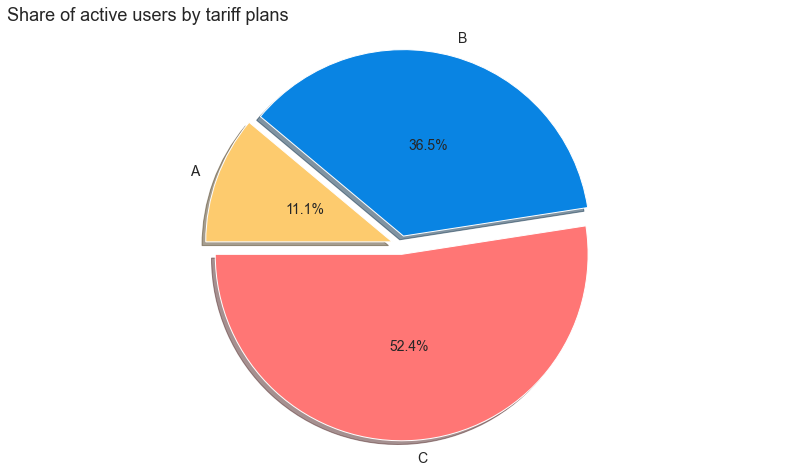

In [63]:
#checking values in column
print(active_users.tariff_plan.value_counts())
#applying function
pie_chart(data=active_users, column='tariff_plan', title='Share of active users by tariff plans')

We can see that among active clients we have a bit less users with tariff C, and a bit more clients with tariff A and B respectively than for all clients.

For calculating company profit I need to create some additional tables:

First I want to find how many operators clients used per month:

In [64]:
#creating pivot table for grouping columns
n_operator = df_calls.query('direction == "out"').pivot_table(index=['user_id', 'operator_id', 'month']).reset_index()
#finding number of used orerator for each client per month
n_operator = n_operator.groupby(['user_id', 'month']).operator_id.count().reset_index()
#renaming columns
n_operator.columns = ['user_id','month', 'n_operator']
#checking result
n_operator.head()

,user_id,month,n_operator
0,166377,8,5
1,166377,9,4
2,166377,10,5
3,166377,11,4
4,166391,8,1


This table contain user id, month and number of operators for each user per month.  
It will be used for calculating company revenue from used operator.

Now I want to select data that required for calculating revenue:
- we have interest only in outcoming calls, because all incoming calls is free, therefore I will select only outcoming calls;
- we don't need calls that were missed, cause in this case we have zero seconds duration of call and clients pay only for operator (this was taken into account in the `n_operator` table). So I will choose only accepted calls;
- `duration` and `is_missed_call` as was told I will select only out and accepted calls, so, this columns can be deleted;
- `operator id` we don't need this column here, I have already find number of used operator for each user per month;
- `calls_count` - information of number of calls is not necessary for calculating revenue;
- `total_call_duration` - I assume that clients don't pay for call waiting, only for minutes of talk, therefore I can delete this column also. 

In [65]:
#selecting required data
filt_calls = df_calls.query('direction == "out" & is_missed_call == False').copy()
filt_calls = filt_calls.drop(columns=['operator_id', 'direction', 'is_missed_call',
                                      'calls_count', 'total_call_duration'])
#checking result
filt_calls.head()

,user_id,date,internal,call_duration,month
3,166377,2019-08-05,True,10,8
5,166377,2019-08-05,False,3,8
13,166377,2019-08-06,False,800,8
15,166377,2019-08-07,False,21,8
16,166377,2019-08-07,False,232,8


This table contains information of call duration and type of call (internal or not) for each user per month.  
As we know we have different price for each minute depends on if call was internal and not.  
I will split call duration (internal and not internal) to the two tables:

In [66]:
#creating table with internal calls for each user per month
internal_calls = filt_calls.query('internal == True').pivot_table(index=['user_id', 'month'],
                                                values='call_duration', aggfunc='sum').reset_index()
#renaming columns
internal_calls.columns = ['user_id', 'month', 'int_call_duration']
#checking result
internal_calls.head()

,user_id,month,int_call_duration
0,166377,8,10
1,166377,10,2
2,166377,11,120
3,166405,10,271
4,166405,11,35


This table contain call duration of internal calls for each user per month.  
According tecnical information each client have 2000 free minutes per month and they need to pay only for over limit minutes. 
Let's check if we have clients who had call duration for internal calls more than 2000 minutes per month:

In [67]:
#conversion of seconds to minutes
internal_calls['int_call_duration'] = internal_calls['int_call_duration']/60
#finding maximum call duration
internal_calls.int_call_duration.max()

1199.3666666666666

Someone was so close to limit, but looks like nobody crossed the limit.  
Since all clients didn't met the limit I will not use this table for the future calculation (I will take only regular outgoing calls)

In [68]:
#creating table with not internal calls for each user per month
outgoing_calls = filt_calls.query('internal == False').pivot_table(index=['user_id', 'month'],
                                                 values='call_duration', aggfunc='sum').reset_index()
#renaming columns
outgoing_calls.columns = ['user_id', 'month', 'call_duration']
#checking result
outgoing_calls.head()

,user_id,month,call_duration
0,166377,8,64968
1,166377,9,85609
2,166377,10,81599
3,166377,11,78243
4,166405,8,44039


This table contain call duration of not internal calls for each user per month.  
Let's convert second to minutes in column `call_duration`:

In [69]:
#conversion of seconds to minutes
outgoing_calls['call_duration'] = outgoing_calls['call_duration']/60
#checking result
outgoing_calls.sample()

,user_id,month,call_duration
345,167645,10,115.0


As we know clients need to pay every month for tariff plan that he have.
But in case if user started to be our client in the middle of month the payment reduced in proportion of days left.  
Therefore to calculate payment for tariff plan correctly we need to find how many days each user was with us in each month (cause clients were joining from august till october).   

In [70]:
#creating column with end date of collecting data
active_users['date_end'] = "2019-11-28"
#changing data type to datetime
active_users['date_end'] = pd.to_datetime(active_users['date_end'])

In [71]:
#calculating lifetime
active_users['lifetime'] = active_users['date_end'] - active_users['date_start']
active_users['lifetime'] = active_users['lifetime'].dt.days
#checking result
active_users.head()

,user_id,tariff_plan,date_start,date_end,lifetime
0,166713,A,2019-08-15,2019-11-28,105
1,166901,A,2019-08-23,2019-11-28,97
4,168193,A,2019-10-16,2019-11-28,43
7,168252,A,2019-10-17,2019-11-28,42
16,168253,A,2019-10-18,2019-11-28,41


This table contains information of lifetime, tariff plan and start date for each user.  
Now we can find how many days each client was with us per month:

In [72]:
#creating function to calculate number of days user was with us in november
def days_nov(row):
    tariff = row['tariff_plan']
    if tariff == "A":
        return 28
    elif tariff == "B":
        return 28
    elif tariff == "C":
        return 28
#applying function to active users table    
active_users['11'] = active_users.apply(days_nov, axis=1)
active_users.sample()

,user_id,tariff_plan,date_start,date_end,lifetime,11
711,167130,B,2019-09-03,2019-11-28,86,28


Since last client started contract in the end of october and last date of data stopped collected is 28 of november, it means that on november all clients was 28 days with us.  
Column `11` contain number of days that user with us in november.  

In [73]:
#creating function to calculate number of days user was with us in october
def days_oct(row):
    lifetime = row['lifetime']
    if 28<lifetime<=59:
        return (lifetime - 27)
    elif  lifetime>59:
        return 31
#applying function to active users table 
active_users['10'] = active_users.apply(days_oct, axis=1)
active_users.sample()

,user_id,tariff_plan,date_start,date_end,lifetime,11,10
319,167188,C,2019-09-05,2019-11-28,84,28,31.0


Column `10` contain number of days that user with us in october.  

In [74]:
#creating function to calculate number of days user was with us in semptember
def days_sept(row):
    lifetime = row['lifetime']
    if 59<lifetime<=89:
        return (lifetime - 58)
    elif lifetime>89:
        return 30
#applying function to active users table 
active_users['9'] = active_users.apply(days_sept, axis=1)
active_users.sample()

,user_id,tariff_plan,date_start,date_end,lifetime,11,10,9
490,166678,B,2019-08-14,2019-11-28,106,28,31.0,30.0


Column `9` contain number of days that user with us in september.  

In [75]:
#creating function to calculate number of days user was with us in august
def days_aug(row):
    lifetime = row['lifetime']
    if lifetime>89:
        return (lifetime - 88)
#applying function to active users table
active_users['8'] = active_users.apply(days_aug, axis=1)
active_users.sample()

,user_id,tariff_plan,date_start,date_end,lifetime,11,10,9,8
527,168180,B,2019-10-16,2019-11-28,43,28,16.0,NaN,NaN


Column `8` contain number of days that user with us in august.  

Now I need to reshape the data: columns `11`, `10`, `9` and `8` to rows for future merging tables:

In [76]:
#unpivoting columns into rows
active_users = pd.melt(active_users, id_vars=['user_id', 'tariff_plan', 'date_start',
                                                       'date_end', 'lifetime'], value_vars=['11', '10', '9', '8'],
                            var_name='month', value_name='days_used')

In [77]:
#changing data type
active_users['month'] = active_users['month'].astype(int)
#deleting unnecessary columns
active_users = active_users.drop(columns=['date_start', 'date_end', 'lifetime'])
#checking result
active_users.head()

,user_id,tariff_plan,month,days_used
0,166713,A,11,28.0
1,166901,A,11,28.0
2,168193,A,11,28.0
3,168252,A,11,28.0
4,168253,A,11,28.0


Now this table contains tariff plan and number of day client was with us per month for each client.

[Back to the Table of Contents](#contents)

#### 4.3 Merging tables <a class="anchor" id="chapter18"></a>

Let's create one table for calculating revenue, to do that we need:
- merge table `active_users` **WITH** table `n_operator`;
- then merge resulting table  **WITH** `outgoing_calls` table.

In [78]:
#merging the tables
final_data = pd.merge(left=active_users, right=n_operator, how='outer', on=['user_id', 'month'])
final_data = pd.merge(left=final_data, right=outgoing_calls, how='outer', on=['user_id', 'month'])
#checking result
final_data.head()

,user_id,tariff_plan,month,days_used,n_operator,call_duration
0,166713,A,11,28.0,1.0,2.533333
1,166901,A,11,28.0,4.0,112.183333
2,168193,A,11,28.0,6.0,64.033333
3,168252,A,11,28.0,23.0,9530.983333
4,168253,A,11,28.0,1.0,1239.183333


In the result we got the `final_table` - table that contains information about each user (`user_id`), his tariff plan (`tariff_plan`), number of days clients was with company (`days_used`) per month (`month`), number of operator was used per month (`n_operator`) and call duration for outgoing calls per month (`call_duration`).  
This is perfect table for future calculations company revenue and finding clients with non optimal tariff plan.

[Back to the Table of Contents](#contents)

#### 4.4 Calculating revenue from each client <a class="anchor" id="chapter19"></a>

I am going to calculate revenue from each user per month from tariff plan and from payment for operator.  
To make function simpler I need to create dictionary where will be stored month and number of days that we have in the data:

In [79]:
#creating dictionary
dict_month = {11:30, 10:31, 9:30, 8:31}

In [80]:
#filling NaN values with zero for correct calculations
final_data = final_data.fillna(0)

Payment for tariff plan include monthly charge and payment for call duration, based on this let's find company revenue from each client per month:

In [81]:
#creating function to calculate revenue from each user per month
def revenue(row):
    tariff = row['tariff_plan']
    days = row['days_used']
    duration = row['call_duration']
    month = row['month']
    
    for x in dict_month:
        if tariff == "A" and month == x:
            return (price_A/dict_month[x]*days) + (duration*no_int_calls_A)
        elif tariff == "B" and month == x:
            return (price_B/dict_month[x]*days) + (duration*no_int_calls_B)
        elif tariff == "C" and month == x:
            return (price_C/dict_month[x]*days) + (duration*no_int_calls_C)
    
#applying function to final table
final_data['revenue'] = final_data.apply(revenue, axis=1)

Also monthly client have to pay for each operator that was used irrespective of plan, let's calculate revenue from this:

In [82]:
#calculating revenue from payment for operator for each client per month
final_data['revenu_operator'] = final_data['n_operator']*100

And now let's find total company revenue from each client per month:

In [83]:
#calculating total revenue from each client per month
final_data['total_revenue'] = final_data['revenue']+final_data['revenu_operator']

In [84]:
#checking result
final_data.sample(5)

,user_id,tariff_plan,month,days_used,n_operator,call_duration,revenue,revenu_operator,total_revenue
593,166837,B,10,31.0,0.0,0.0,2000.000000,0.0,2000.000000
692,167998,C,9,0.0,0.0,0.0,0.000000,0.0,0.000000
42,167534,C,11,28.0,0.0,0.0,933.333333,0.0,933.333333
977,167727,C,8,0.0,0.0,0.0,0.000000,0.0,0.000000
1174,167359,B,8,0.0,0.0,0.0,0.000000,0.0,0.000000


This table contains:
- `revenue` - company revenue from tariff plan payment and payment for call duration from each user per month;
- `revenu_operator` - company revenue from monthly payment for used operators from each client;
- `total_revenue` - total sum company revenue from each client per month.

According our tasks I will use only column `revenue` for analysis, since payment for used operators is irrespective of plan.

[Back to the Table of Contents](#contents)

#### Calculating total revenue <a class="anchor" id="chapter20"></a>

In [85]:
revenue = final_data.revenue.sum()
print('Revenue: {:.2f}'.format(revenue))
total_revenue = final_data.total_revenue.sum()
print('Total revenue: {:.2f}'.format(total_revenue))

Revenue: 1613371.39
Total revenue: 1780071.39


Total revenue include revenue from payment for operators were used.

[Back to the Table of Contents](#contents)

#### Revenue by tariff plan <a class="anchor" id="chapter21"></a>

In [86]:
revenue_A = final_data.query('tariff_plan == "A"').revenue.sum()
print('Revenue from clients with tariff plan A: {:.2f}'.format(revenue_A))
revenue_B = final_data.query('tariff_plan == "B"').revenue.sum()
print('Revenue from clients with tariff plan B: {:.2f}'.format(revenue_B))
revenue_C = final_data.query('tariff_plan == "C"').revenue.sum()
print('Revenue from clients with tariff plan C: {:.2f}'.format(revenue_C))

Revenue from clients with tariff plan A: 535932.48
Revenue from clients with tariff plan B: 605535.92
Revenue from clients with tariff plan C: 471902.99


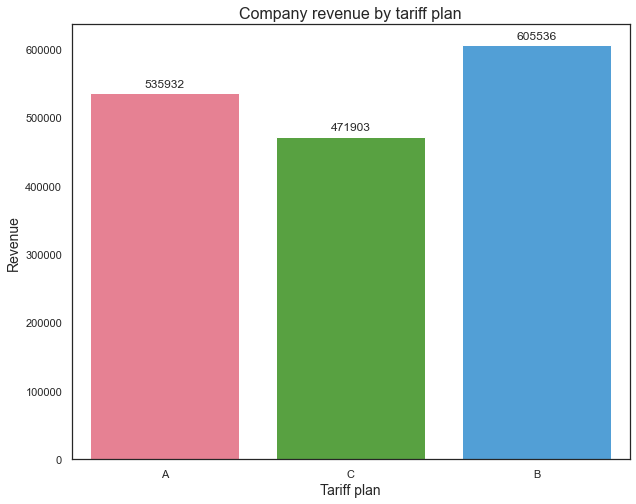

In [87]:
#making a graph
plt.figure(figsize=[10,8])
ax = sns.barplot(x='tariff_plan', y='revenue', data=final_data, palette = 'husl', ci=None, estimator=sum)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Company revenue by tariff plan', fontsize=16)
ax.set_ylabel('Revenue', fontsize=14)    
ax.set_xlabel('Tariff plan', fontsize=14)
plt.show()

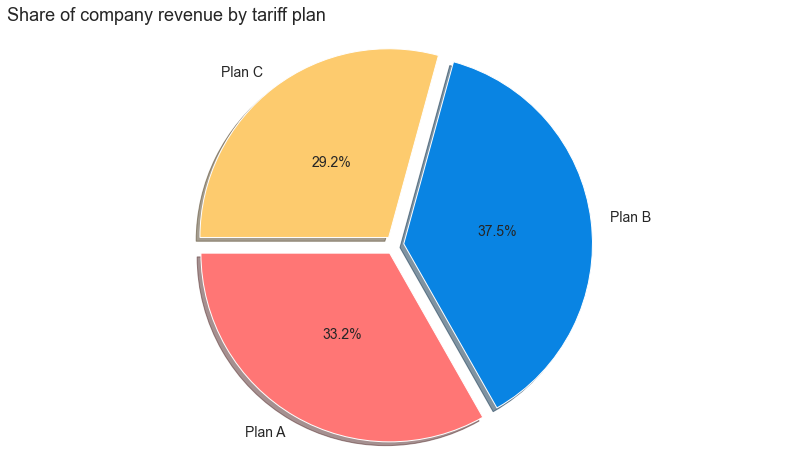

In [88]:
#making a graph
a= revenue_A
b= revenue_B
c= revenue_C
data_pie_plan = [a,b,c]
number = len(data_pie_plan)
#building graph (pie chart)
pie, ax = plt.subplots(figsize=[14,8])
labels = ['Plan A', 'Plan B', 'Plan C']
colors = ['#ff7675', '#0984e3', '#fdcb6e', '#00b894', '#fd79a8', '#a29bfe']
plt.pie(x=data_pie_plan, autopct="%.1f%%",explode=[0.05]*number, labels=labels, pctdistance=0.5, 
        shadow=True, colors=colors, startangle=180, textprops={"fontsize":14})
plt.title('Share of company revenue by tariff plan', fontsize=18, loc='left')
plt.rcParams['font.size'] = 14
ax.axis('equal')
#plt.savefig('task1.png')
plt.show()

Company revenue is higher from clients with tariff B, then revenue from clients with tariff A and C.  
- 37.5% of revenue comes from clients with tariff B;
- 33.2% from clients with tariff A;
- 29.2% from clients with tariff C.

[Back to the Table of Contents](#contents)

#### Revenue per month  <a class="anchor" id="chapter22"></a>

In [89]:
revenue_11 = final_data.query('month == "11"').revenue.sum()
print('Revenue from clients in November: {:.2f}'.format(revenue_11))
revenue_10 = final_data.query('month == "10"').revenue.sum()
print('Revenue from clients in October: {:.2f}'.format(revenue_10))
revenue_9 = final_data.query('month == "9"').revenue.sum()
print('Revenue from clients in September: {:.2f}'.format(revenue_9))
revenue_8 = final_data.query('month == "8"').revenue.sum()
print('Revenue from clients in August: {:.2f}'.format(revenue_8))

Revenue from clients in November: 602938.90
Revenue from clients in October: 561930.82
Revenue from clients in September: 340965.78
Revenue from clients in August: 107535.88


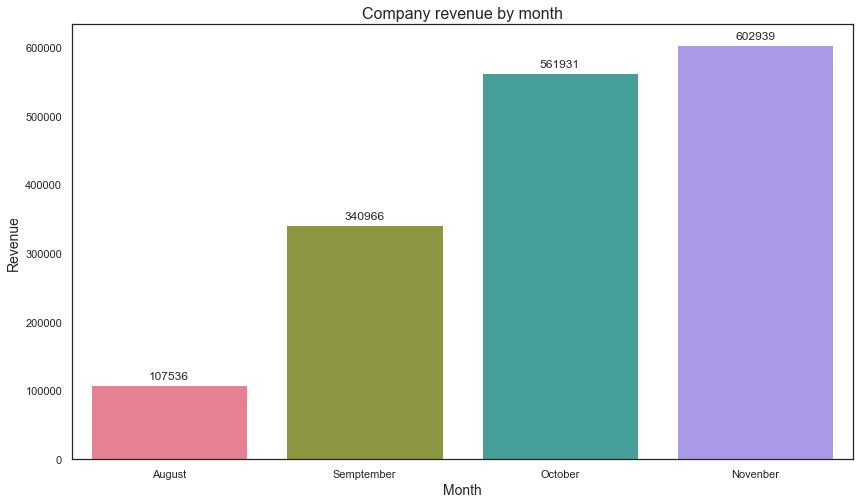

In [90]:
#making a graph
plt.figure(figsize=[14,8])
ax = sns.barplot(x='month', y='revenue', data=final_data, palette = 'husl', ci=None, estimator=sum)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Company revenue by month', fontsize=16)
ax.set_ylabel('Revenue', fontsize=14)    
ax.set_xlabel('Month', fontsize=14)
ax.set_xticklabels(['August', 'Semptember', 'October', 'Novenber'])
plt.show()

As we can see on the graph revenue increase from month to month.   
Revenue sharp increase almost twice in September and than again twice increase in October comparing, but in November revenue increase a bit comparing to the previous month. 
I think it is connected with new clients: we don't have any information on calls from clients who started a contract in November. 

[Back to the Table of Contents](#contents)

#### Revenue per month by tariff plan <a class="anchor" id="chapter23"></a>

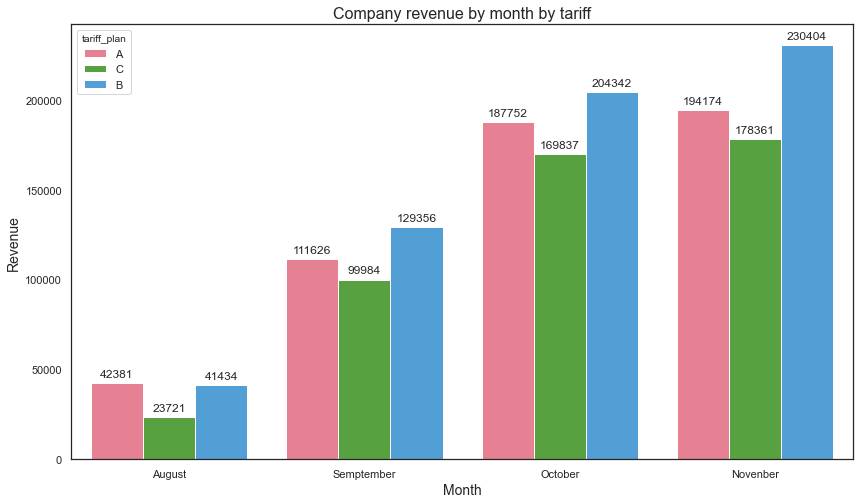

In [91]:
#making a graph
plt.figure(figsize=[14,8])
ax = sns.barplot(x='month', y='revenue', hue='tariff_plan', data=final_data, palette = 'husl', ci=None, estimator=sum)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Company revenue by month by tariff', fontsize=16)
ax.set_ylabel('Revenue', fontsize=14)    
ax.set_xlabel('Month', fontsize=14)
ax.set_xticklabels(['August', 'Semptember', 'October', 'Novenber'])

plt.show()

Here we can see the same situation as on previous graphs, revenue from clients with tariff plan B is higher all monthes then from clients with other plans, each month revenue increasing for each tariff.

[Back to the Table of Contents](#contents)

#### ARPU (total and for each plan) <a class="anchor" id="chapter24"></a>

In [92]:
total_users = final_data.user_id.nunique()
ARPU = revenue/total_users
print('Number of users:', total_users)
print('Average revenue per user = {:.2f}'.format(ARPU))

Number of users: 307
Average revenue per user = 5255.28


In [93]:
total_users_A = final_data.query('tariff_plan == "A"').user_id.nunique()
ARPU_A = revenue_A/total_users_A
print('Number of users with tariff plan A:', total_users_A) 
print('Average revenue per user with tariff plan A = {:.2f}'.format(ARPU_A))
print('')
total_users_B = final_data.query('tariff_plan == "B"').user_id.nunique()
ARPU_B = revenue_B/total_users_B
print('Number of users with tariff plan B:', total_users_B)
print('Average revenue per user with tariff plan B = {:.2f}'.format(ARPU_B))
print('')
total_users_C = final_data.query('tariff_plan == "C"').user_id.nunique()
ARPU_C = revenue_C/total_users_C
print('Number of users with tariff plan C:', total_users_C)
print('Average revenue per user with tariff plan C = {:.2f}'.format(ARPU_C))

Number of users with tariff plan A: 34
Average revenue per user with tariff plan A = 15762.72

Number of users with tariff plan B: 112
Average revenue per user with tariff plan B = 5406.57

Number of users with tariff plan C: 161
Average revenue per user with tariff plan C = 2931.07


Despite of fact that we have highest number of users with tariff plan C, ARPU from users with tariff C is lowest for the all period.  
Also we have only 34 clients with tariff A and highest ARPU here.

Let's make a graph for clarity:

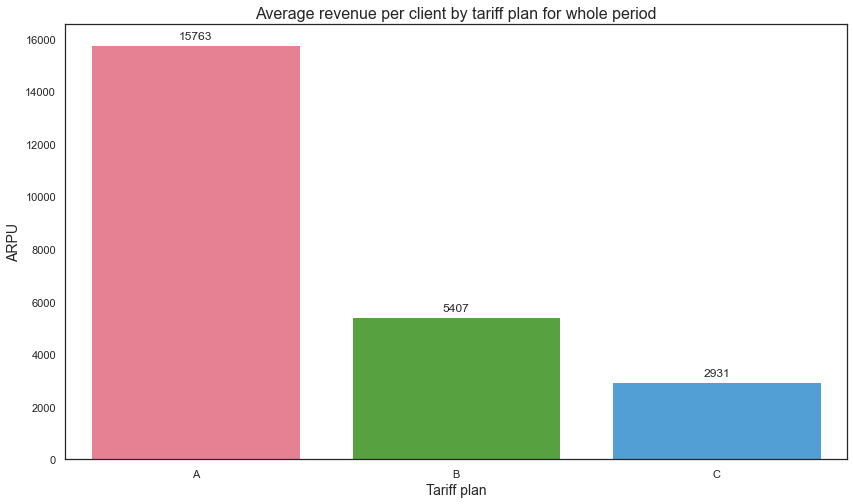

In [94]:
#making a graph
plt.figure(figsize=[14,8])
ax = sns.barplot(x=["A", "B", "C"], y=[ARPU_A, ARPU_B, ARPU_C], data=final_data, palette = 'husl', ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Average revenue per client by tariff plan for whole period', fontsize=16)
ax.set_ylabel('ARPU', fontsize=14)    
ax.set_xlabel('Tariff plan', fontsize=14)
plt.show()

Graph shows that average revenue per client highest for clients with tariff plan A.   
Then 3 times less ARPU from clients with tariff B.   
And the lowest ARPU from clients with tariff C.   
Let's check ARPU by tariff plan per month:

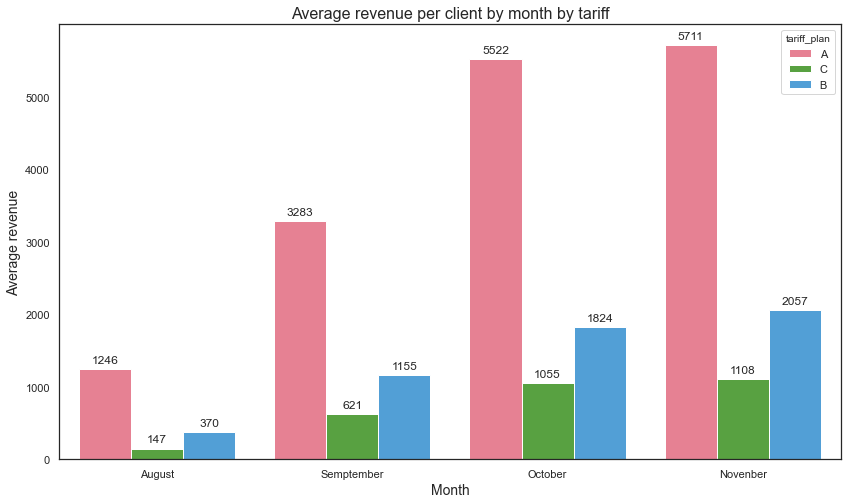

In [95]:
#making a graph
plt.figure(figsize=[14,8])
ax = sns.barplot(x='month', y='revenue', hue='tariff_plan', data=final_data, palette = 'husl', ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Average revenue per client by month by tariff', fontsize=16)
ax.set_ylabel('Average revenue', fontsize=14)    
ax.set_xlabel('Month', fontsize=14)
ax.set_xticklabels(['August', 'Semptember', 'October', 'Novenber'])
plt.show()

Here we can see the same situation as on previous graphs, average revenue per clients with tariff plan A is higher all monthes then from clients with other plans, each month ARPU increasing for each tariff.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter25"></a>

**In this step:** 
- non active clients were detected;
- data was filtered;
- revenue from tariff plan and from payment for each operator were calculated.

**I found:**
- Number of active users: 307;
    - Number of users with tariff plan A: 34;
    - Number of users with tariff plan B: 112;
    - Number of users with tariff plan C: 161.
    
    
- Revenue: 1613371.39;
    - 37.5% of revenue comes from clients with tariff B;
    - 33.2% from clients with tariff A;
    - 29.2% from clients with tariff C.


- Each month revenue increasing for each tariff;


- Average revenue per user =  5255.28
    - ARPU with tariff plan A =  15762.72;
    - ARPU with tariff plan B =  5406.57;
    - ARPU with tariff plan C =  2931.07.

[Back to the Table of Contents](#contents)

### 5. Finding clients who overpay for tariff plan <a class="anchor" id="chapter30"></a>

#### 5.1 When clients need another tariff plan? <a class="anchor" id="chapter31"></a>

We know price for each tariff plan and how much each minutes cost according tariff.  
Therefore we can find threshold in minutes crossing which client need another plan:

In [96]:
#creating function
def threshold(minutes):
    for minutes in range(0, 50000, 1):
        payment_A = price_A + minutes * no_int_calls_A
        payment_B = price_B + minutes * no_int_calls_B
        payment_C = price_C + minutes * no_int_calls_C
        if payment_C > payment_B:
            print('Threshold for plan C:', minutes)
            break
    for minutes in range(0, 50000, 1):  
        payment_A = price_A + minutes * no_int_calls_A
        payment_B = price_B + minutes * no_int_calls_B
        payment_C = price_C + minutes * no_int_calls_C
        if payment_B > payment_A:
            print('Threshold for plan B:', minutes)
            return
            
#checking result
threshold(0)

Threshold for plan C: 5001
Threshold for plan B: 30001


Results shows that if client talk less than 5001 minutes per month optimal plan for him is C.  
If client talk more than 5000 minutes per month optimal plan for him is B.  
And if client talk more than 30000 minutes per month optimal plan for him is A.  
Now we can find clients with non optimal plan in our data.

[Back to the Table of Contents](#contents)

#### 5.2 Finding clients who overpay for tariff plan <a class="anchor" id="chapter32"></a>

To finding clients who overpay for tariff plan I will take only November, cause we have full data (in terms of time period) for this month for all users calls, i.e all clients from our table were with company equall number of days in November.  

Also I want to pay attention on clients with zero call duration for outgoing accepted calls in November.  
These clients didn't have any accepted outgoing call during November, BUT they still active, they got incoming calls at least.  
I assume that they can use our service only for incomming calls or probably in November they didn't need to do any calls, I don't know their reasons to stop doing out calls, with data that I have I can only assume.  
I have fact that they still with us and they still in active group. Let's check some information about them:

In [97]:
#checking information about clients with zero duration
final_data.query('month == 11 and call_duration == 0').tariff_plan.value_counts()

C    84
B    46
A    11
Name: tariff_plan, dtype: int64

So, what we have: 141 client had zero calls duration in November, 84 of these clients with tariff plan C, and it's absolutely profitably for them, cause as we know this tariff plan have least monthly price and for clients who do zero or small amount af calls this plan is good.  
But we have 57 clients who overpay for plan A and B, cause monthly price for these tariffs is higher that for C.  
On these clients I want company pay special attention, cause on my opinion these 57 clients can potentially leave the company for more profitable tariff plan in our competitors.  
Also If we decided to suggest them new plan we can find the reason why they have zero duration calls.

In [98]:
#saving user id of these 57 users
zero_users = final_data.query('month == 11 and call_duration == 0 and tariff_plan != "C"').user_id

Now according thresholds that we found in the previous step we can find clients who overpay:

In [99]:
#creating a function
def optimal_plan(row):
    duration = row['call_duration']
    month = row['month']
    tariff = row['tariff_plan']
    if 5000>= duration and month == 11:
        return("C")
    elif 5000 < duration <= 30000 and month == 11:
        return('B')
    elif 30000 < duration and month == 11:
        return('A')
    else:
        return(tariff)
#applying the function
final_data['optimal_plan'] = final_data.apply(optimal_plan, axis=1)
#checking result
final_data.sample(5)

,user_id,tariff_plan,month,days_used,n_operator,call_duration,revenue,revenu_operator,total_revenue,optimal_plan
81,167756,C,11,28.0,1.0,832.666667,1516.200000,100.0,1616.200000,C
141,167079,C,11,28.0,0.0,0.000000,933.333333,0.0,933.333333,C
1120,168047,B,8,0.0,0.0,0.000000,0.000000,0.0,0.000000,B
840,168018,B,9,0.0,0.0,0.000000,0.000000,0.0,0.000000,B
828,168000,B,9,0.0,0.0,0.000000,0.000000,0.0,0.000000,B


I found clients who overpay and saved optimal plan for them in new column `optimal_plan`, for clients those current plan is optimal I dubed plan as in `tariff_plan` column into new column.  
To make my analysis easier I will create column with information if client need new plan or not:

In [100]:
#creating a function
def n_non_optimal(row):
    tariff_plan = row['tariff_plan']
    optimal_plan = row['optimal_plan']
    if optimal_plan is not tariff_plan:
        return('Yes')
    else:
        return('No')
#applying the function    
final_data['need_change'] = final_data.apply(n_non_optimal, axis=1)
#checking result
final_data.sample(5)

,user_id,tariff_plan,month,days_used,n_operator,call_duration,revenue,revenu_operator,total_revenue,optimal_plan,need_change
502,167263,B,10,31.0,1.0,0.000000,2000.000000,100.0,2100.000000,B,No
346,166619,C,10,31.0,1.0,13.783333,1009.648333,100.0,1109.648333,C,No
1076,166717,C,8,16.0,1.0,45.066667,547.675699,100.0,647.675699,C,No
756,167052,C,9,30.0,2.0,83.633333,1058.543333,200.0,1258.543333,C,No
424,166585,C,10,31.0,0.0,0.000000,1000.000000,0.0,1000.000000,C,No


New column `need_change` contains: 
- Yes - for clients who have non optimal plan; 
- No - for clients which current plan is optimal for them.

Let's check how many clients with non optimal plan:

In [101]:
print('Number of clients with non optimal plan:', final_data.query('need_change == "Yes"')['user_id'].count())
print('Persentage of clients with non optimal plan: {:.2%}'.format(
      final_data.query('need_change == "Yes"')['user_id'].count()/final_data['user_id'].nunique()))

Number of clients with non optimal plan: 143
Persentage of clients with non optimal plan: 46.58%


Almost halt of active clients have non optimal plan, let's check what current tariff they have:

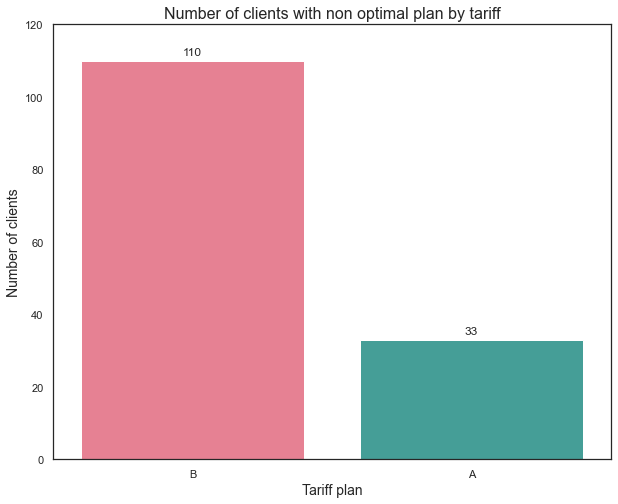

In [102]:
n_non_optimal = final_data.query('need_change == "Yes"')['tariff_plan'].value_counts()
#making a graph
plt.figure(figsize=[10,8])
ax = sns.barplot(x=['B', 'A'], y=n_non_optimal, data=final_data, palette = 'husl', ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Number of clients with non optimal plan by tariff', fontsize=16)
ax.set_ylabel('Number of clients', fontsize=14)    
ax.set_xlabel('Tariff plan', fontsize=14)
plt.ylim(0, 120)
plt.show()

In [103]:
print('Persentage of clients with non optimal plan B: {:.2%}'.format(
    final_data.query('need_change == "Yes" & tariff_plan == "B"')['user_id'].count()/total_users_B))
print('Persentage of clients with non optimal plan A: {:.2%}'.format(
    final_data.query('need_change == "Yes" & tariff_plan == "A"')['user_id'].count()/total_users_A))

Persentage of clients with non optimal plan B: 98.21%
Persentage of clients with non optimal plan A: 97.06%


Interesting result, we don't have clients with tariff C here, and 97%/98% of all clients with tariff plan B and A are clients with non optimal plan.  
Let's check what plan considered optimal for them:

In [104]:
final_data.query('need_change == "Yes"')['optimal_plan'].value_counts()

C    140
B      3
Name: optimal_plan, dtype: int64

Most of the users with non optimal plan need plan C and only 3 clients need plan B instead current.  
Looks like most of these clients have too small call duration for consider their current plan optimal.  
- But if someone overpay slightly do we really need to change his plan?
- What about clients who overpay a lot?
- How does changing plan will affect to the company revenue?  

To get answer on this questions let's categorize our clients and find how revenue will change if we switch tariff plan for users in each category:

[Back to the Table of Contents](#contents)

#### 5.3 Categorizing clients who overpay <a class="anchor" id="chapter33"></a>

I want to split clients into 2 groups:
- slightly - who overpay a bit
- very - who overpay a lot

To do that I need to find sum of their overpay first:

I will save table with only neccesary columns into new_plan_data paramrter:

In [105]:
new_plan_data = final_data.copy()
new_plan_data = new_plan_data.drop(columns=['n_operator', 'revenu_operator', 'total_revenue'])
new_plan_data.sample()

,user_id,tariff_plan,month,days_used,call_duration,revenue,optimal_plan,need_change
692,167998,C,9,0.0,0.0,0.0,C,No


Then I will calculate revenue with changed tariff plan to optimal in November for all clients:

In [106]:
#creating function to calculate revenue from each user per month
def revenue_optimal(row):
    tariff = row['optimal_plan']
    days = row['days_used']
    duration = row['call_duration']
    month = row['month']
    
    for x in dict_month:
        if tariff == "A" and month == x:
            return (price_A/dict_month[x]*days) + (duration*no_int_calls_A)
        elif tariff == "B" and month == x:
            return (price_B/dict_month[x]*days) + (duration*no_int_calls_B)
        elif tariff == "C" and month == x:
            return (price_C/dict_month[x]*days) + (duration*no_int_calls_C)
    
#applying function to final table
new_plan_data['revenue_all'] = new_plan_data.apply(revenue_optimal, axis=1)

In [107]:
#checking result
new_plan_data.head()

,user_id,tariff_plan,month,days_used,call_duration,revenue,optimal_plan,need_change,revenue_all
0,166713,A,11,28.0,2.533333,4667.68,C,Yes,935.106667
1,166901,A,11,28.0,112.183333,4711.54,C,Yes,1011.861667
2,168193,A,11,28.0,64.033333,4692.28,C,Yes,978.156667
3,168252,A,11,28.0,9530.983333,8479.06,B,Yes,6632.158333
4,168253,A,11,28.0,1239.183333,5162.34,C,Yes,1800.761667


New column `revenue_all` contains revenue from each user per month with optimal tariff plan in November.  
Let's check new revenue and copmare with old revenue:

In [108]:
#calculating new total revenue
revenue_new = new_plan_data.revenue_all.sum()
print('Old revenue: {:.2f}'.format(revenue))
print('New revenue: {:.2f}'.format(revenue_new))
print('Difference: {:.2f}'.format(revenue - revenue_new))

Old revenue: 1613371.39
New revenue: 1401592.81
Difference: 211778.57


As we can see company lose 211778 if we will change tariff plan for all clients to optimal.  
Let's find how much clients overpay:

In [109]:
#calculating difference between revenue with optimal plan and current revenue
new_plan_data['overpayment'] = new_plan_data['revenue'] - new_plan_data['revenue_all']

For clients who overpay I found sum of their ovepray and stored it in column `overpayment`.

In [110]:
#checking statistical information about this column
new_plan_data.query('need_change == "Yes"').overpayment.describe()

count     143.000000
mean     1480.969056
std      1131.004960
min       291.350000
25%       916.583333
50%       933.333333
75%       933.333333
max      3733.333333
Name: overpayment, dtype: float64

In [111]:
#calculating difference in price for tarif B and C / A and C in November
print('Difference in price for tarif B and C =', (price_B - price_C)/30*28)
print('Difference in price for tarif A and C =', (price_A - price_C)/30*28)

Difference in price for tarif B and C = 933.3333333333334
Difference in price for tarif A and C = 3733.3333333333335


Clients with non optimal tariff plan overpay 1480 in average.  
Overpayment range from 291 to 3733, most of the clients with non optimal tariff overpay less than 933.33.
If we look on quartiles we can distinguish 2 groups:
- clients who overpay a bit: less than 933.33
- clients who overpay a lot: more than 933.33

But what can we do with clients who overpay exactly 933.33, as we remember we have clients with zero call duration in Novrmber and most of this need plan C, difference between tariff B and C in November is 933.33 (cause we have data only for 28 days in November), so clients with overpayment 933.33 are clients with zero call duration in November and plan B. So, what will we do them?   

As was told I reccomend to pay attention on these clients as potential clients who can leave, therefore I will put these users into `very` categeory (clients who overpay a lot), cause company will pay attention on clients who overpay a lot first.   

Clients with zero call duration in November and current paln A who need optimal plan have huge and highest overpayment 3733.33 and they automaticly will be in the group `very`.   

Now we can categorize data, I will choose median as threshold between categories.

In [112]:
#creating threshold
threshold_category = new_plan_data.query('need_change == "Yes"').overpayment.median()

In [113]:
#creating function
def overpay(row):
    over_p = row['overpayment']
    change = row['need_change']
    if over_p < threshold_category and change == "Yes":
        return('slightly')
    elif over_p >= threshold_category and change == "Yes":
        return('very')
#applying function to the new_plan_data table
new_plan_data['overpay'] = new_plan_data.apply(overpay, axis=1)

In [114]:
#checking result
new_plan_data.sample(5)

,user_id,tariff_plan,month,days_used,call_duration,revenue,optimal_plan,need_change,revenue_all,overpayment,overpay
136,167188,C,11,28.0,442.966667,1243.410000,C,No,1243.410000,0.0,None
463,166803,C,10,31.0,0.000000,1000.000000,C,No,1000.000000,0.0,None
981,168008,C,8,0.0,0.000000,0.000000,C,No,0.000000,0.0,None
1186,167847,B,8,0.0,0.000000,0.000000,B,No,0.000000,0.0,None
572,167847,B,10,30.0,0.000000,1935.483871,B,No,1935.483871,0.0,None


Clients who overpay were catezorized.  
In column `overpay` store categories:
- slightly - who overpay a bit;
- very - who overpay a lot.  

Let's find now many users we have in each category:

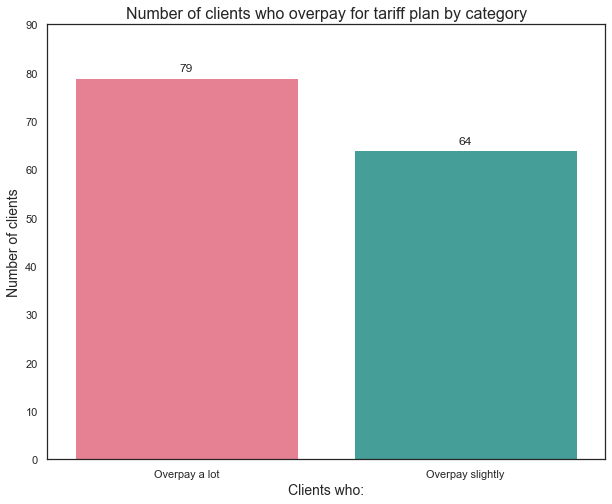

In [115]:
cat_users = new_plan_data.query('need_change == "Yes"')['overpay'].value_counts()
#making a graph
plt.figure(figsize=[10,8])
ax = sns.barplot(x=['Overpay a lot', 'Overpay slightly'], y=cat_users, data=final_data, palette = 'husl', ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Number of clients who overpay for tariff plan by category', fontsize=16)
ax.set_ylabel('Number of clients', fontsize=14)    
ax.set_xlabel('Clients who:', fontsize=14)
plt.ylim(0, 90)
plt.show()

Graph shows that we have 79 clients who overpay a lot and 64 clients who overpay slightly.  
Let's check where is our clients with zero call duration in November:

In [116]:
new_plan_data.query('user_id in @zero_users and need_change == "Yes"').overpay.value_counts()

very    57
Name: overpay, dtype: int64

Clients with zero call duration in the `very` group (clients who overpay a lot).  

In [117]:
new_plan_data.query('need_change == "Yes"').groupby('tariff_plan')['overpay'].value_counts()

tariff_plan  overpay 
A            very        33
B            slightly    64
             very        46
Name: overpay, dtype: int64

Clients with tariff plan A with non optimal plan only in overpay a lot group.  
Clients with tariff B - 64 in the slighhtly group, 46 over pay a lot.

[Back to the Table of Contents](#contents)

#### 5.4 Calculating revenue from clients with optimal tariff plan by category <a class="anchor" id="chapter34"></a>

To calculating revenue from clients with optimal tariff plan by category we need to find optimal plan for each category:

In [118]:
#creating function
def opt_slightly(row):
    overpay = row['overpay']
    change = row['need_change']
    optimal_plan = row['optimal_plan']
    tariff_plan = row['tariff_plan']
    
    if overpay == "slightly" and change == "Yes":
        return(optimal_plan)
    else:
        return(tariff_plan)
#applying function to the new_plan_data table
new_plan_data['optimal_plan_slightly'] = new_plan_data.apply(opt_slightly, axis=1)

In [119]:
#creating function
def opt_alot(row):
    overpay = row['overpay']
    change = row['need_change']
    optimal_plan = row['optimal_plan']
    tariff_plan = row['tariff_plan']
    
    if overpay == "slightly" and change == "Yes":
        return(tariff_plan)
    else:
        return(optimal_plan)
#applying function to the new_plan_data table
new_plan_data['optimal_plan_very'] = new_plan_data.apply(opt_alot, axis=1)

In [120]:
#checking result
new_plan_data.sample()

,user_id,tariff_plan,month,days_used,call_duration,revenue,optimal_plan,need_change,revenue_all,overpayment,overpay,optimal_plan_slightly,optimal_plan_very
285,168578,B,11,28.0,0.0,1866.666667,C,Yes,933.333333,933.333333,very,B,C


I created columns by analogy with creating column `optimap_plan` for catigories:  
- `optimal_plan_slightly` with optimal tariff plan for clients who ovepray slightly;
- `optimal_plan_very` with optimal tariff plan for clients who overpay very.  

Let's calculate new revenue for each category in case if we switch plans to optimal:

In [121]:
#creating function to calculate revenue from each user per month
def revenue_optimal_c1(row):
    tariff = row['optimal_plan_slightly']
    days = row['days_used']
    duration = row['call_duration']
    month = row['month']
    
    for x in dict_month:
        if tariff == "A" and month == x:
            return (price_A/dict_month[x]*days) + (duration*no_int_calls_A)
        elif tariff == "B" and month == x:
            return (price_B/dict_month[x]*days) + (duration*no_int_calls_B)
        elif tariff == "C" and month == x:
            return (price_C/dict_month[x]*days) + (duration*no_int_calls_C)
    
#applying function to final table
new_plan_data['revenue_slightly'] = new_plan_data.apply(revenue_optimal_c1, axis=1)

In [122]:
#creating function to calculate revenue from each user per month
def revenue_optimal_c2(row):
    tariff = row['optimal_plan_very']
    days = row['days_used']
    duration = row['call_duration']
    month = row['month']
    
    for x in dict_month:
        if tariff == "A" and month == x:
            return (price_A/dict_month[x]*days) + (duration*no_int_calls_A)
        elif tariff == "B" and month == x:
            return (price_B/dict_month[x]*days) + (duration*no_int_calls_B)
        elif tariff == "C" and month == x:
            return (price_C/dict_month[x]*days) + (duration*no_int_calls_C)
    
#applying function to final table
new_plan_data['revenue_very'] = new_plan_data.apply(revenue_optimal_c2, axis=1)

In [123]:
#checking result
new_plan_data.sample(5)

,user_id,tariff_plan,month,days_used,call_duration,revenue,optimal_plan,need_change,revenue_all,overpayment,overpay,optimal_plan_slightly,optimal_plan_very,revenue_slightly,revenue_very
860,166813,B,9,30.0,13.550000,2006.775000,B,No,2006.775000,0.0,None,B,B,2006.775000,2006.775000
658,166997,C,9,30.0,3244.483333,3271.138333,C,No,3271.138333,0.0,None,C,C,3271.138333,3271.138333
1148,166503,B,8,26.0,261.016667,1807.927688,B,No,1807.927688,0.0,None,B,B,1807.927688,1807.927688
756,167052,C,9,30.0,83.633333,1058.543333,C,No,1058.543333,0.0,None,C,C,1058.543333,1058.543333
1159,167999,B,8,0.0,0.000000,0.000000,B,No,0.000000,0.0,None,B,B,0.000000,0.000000


Revenue was calculated by analogy with calculating revenue for all users with optimal plan (column `revenue_2`):
- column `revenue_slightly` contains revenue from each user per month in case with changing plans to optimal only for users who overpay slightly;
- column `revenue_very` contains revenue from each user per month in case with changing plans to optimal only for users who overpay very.

Let's compare all revenues:

[Back to the Table of Contents](#contents)

#### 5.5 Comparing revenues from each clients group <a class="anchor" id="chapter35"></a>

We have 4 groups:
- clients with current tariff plan;
- clients with optimal tariff plan for all users;
- clients with optimal tariff plan for users who overpay slightly;
- clients with optimal tariff plan for users who overpay very.

I will compare these groups to understand how company revenue will change if we switch tariff plans.

**First let's compare revenue for the whole period if we will change tariff plans in November:**

In [124]:
#calculating new total revenues
print('Current revenue: {:.2f}'.format(revenue))
print('Revenue if we will change all tariff plans to optimal: {:.2f}'.format(revenue_new))
print('Difference: {:.2f}'.format(revenue - revenue_new))
print('Loss: {:.2%}'.format((revenue - revenue_new)/revenue))
print('')
revenue_slightly = new_plan_data.revenue_slightly.sum()
print('Revenue if we will change tariff plan to optimal only for clients who overpay slightly: {:.2f}'.format(revenue_slightly))
print('Difference: {:.2f}'.format(revenue - revenue_slightly))
print('Loss: {:.2%}'.format((revenue - revenue_slightly)/revenue))
print('')
revenue_very = new_plan_data.revenue_very.sum()
print('Revenue if we will change tariff plan to optimal only for clients who overpay very: {:.2f}'.format(revenue_very))
print('Difference: {:.2f}'.format(revenue - revenue_very))
print('Loss: {:.2%}'.format((revenue - revenue_very)/revenue))

Current revenue: 1613371.39
Revenue if we will change all tariff plans to optimal: 1401592.81
Difference: 211778.57
Loss: 13.13%

Revenue if we will change tariff plan to optimal only for clients who overpay slightly: 1559453.35
Difference: 53918.04
Loss: 3.34%

Revenue if we will change tariff plan to optimal only for clients who overpay very: 1455510.85
Difference: 157860.53
Loss: 9.78%


Let's make a graph for clarity:

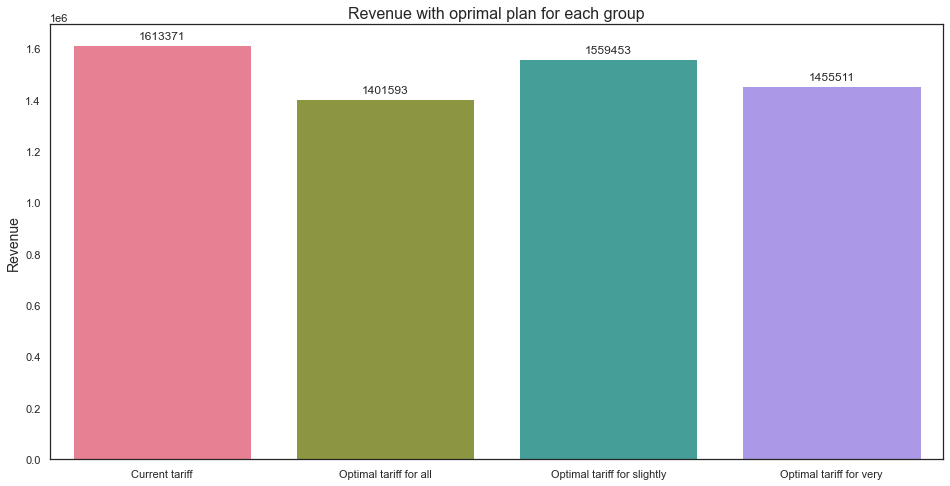

In [125]:
#making a graph
plt.figure(figsize=[16,8])
ax = sns.barplot(x=['Current tariff', 'Optimal tariff for all',
                    'Optimal tariff for slightly',
                    'Optimal tariff for very'],
                 y=[revenue, revenue_new, revenue_slightly, revenue_very],
                 data=new_plan_data, palette = 'husl', ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Revenue with oprimal plan for each group', fontsize=16)
ax.set_ylabel('Revenue', fontsize=14)    
plt.show()

As we can see if we analyse information about our clients calls for 1 month (when all clients were active and when we exclude new clients who started contractis in considered month), find clients with not optimal plan and change tariff plan in this month for all users to optimal or for some categories we will get these results:

- if we switch the tariff plan to optimal for all users: we can get 13% less revenue;
- if we switch the tariff plan to optimal for clients who overpay slightly: we can get 3.34% less revenue;
- if we switch the tariff plan to optimal for clients who overpay very: we can get 9.78% less revenue.

Let's check how revenue by tariff plan will change:

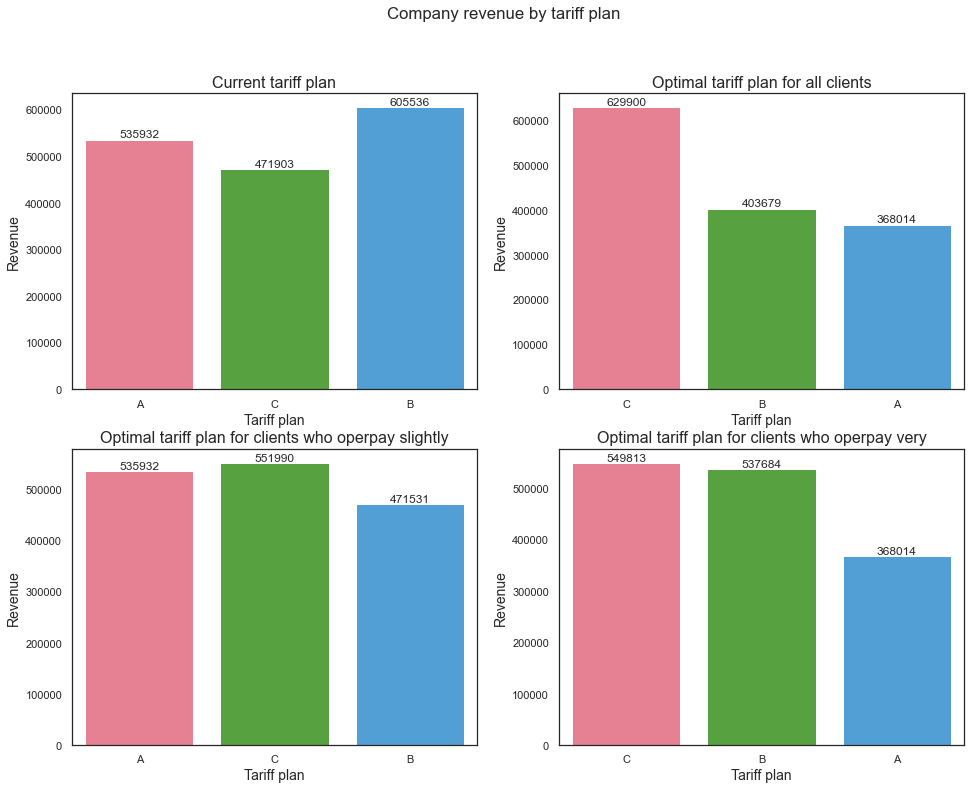

In [126]:
#making a graph
def graph_revenue(row, col, column_x, column_y, title):
    ax = sns.barplot(ax=axes[row,col], x=column_x, y=column_y, data=new_plan_data,
                     palette = 'husl', ci=None, estimator=sum)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points', size=12)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Revenue', fontsize=14)    
    ax.set_xlabel('Tariff plan', fontsize=14)
    
#creating subplot (one graph for multiple function)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
#setting main titles
fig.suptitle('Company revenue by tariff plan')
#applying functions
graph_revenue(row=0, col=0, column_x = 'tariff_plan',  column_y = 'revenue',
              title = 'Current tariff plan')
graph_revenue(row=0, col=1, column_x = 'optimal_plan',  column_y = 'revenue_all',
              title = 'Optimal tariff plan for all clients')
graph_revenue(row=1, col=0, column_x = 'optimal_plan_slightly',  column_y = 'revenue_slightly',
              title = 'Optimal tariff plan for clients who operpay slightly')
graph_revenue(row=1, col=1, column_x = 'optimal_plan_very',  column_y = 'revenue_very',
              title = 'Optimal tariff plan for clients who operpay very')
plt.show()


Graph shows:
- if we switch the tariff plan to optimal for all users or for clients by categories: revenue from tariff plan C will be highest;
- if we switch the tariff plan to optimal for clients who overpay slightly: revenue from tariff plan B will be lowest;
- if we switch the tariff plan to optimal for clients who overpay very: revenue from tariff plan A will be lowest.

Let's check how changes number of clients by tariff plan:

In [127]:
cur = new_plan_data.query('month == "11"').pivot_table(index='tariff_plan', values='user_id', aggfunc='count').reset_index()
cur.rename(columns={'revenue': 'revenue_current', 'user_id': 'n_users_current'}, inplace=True)

new = new_plan_data.query('month == "11"').pivot_table(index='optimal_plan', values='user_id', aggfunc='count').reset_index()
new.rename(columns={'optimal_plan': 'tariff_plan', 'user_id': 'n_users_all'}, inplace=True)

sl = new_plan_data.query('month == "11"').pivot_table(index='optimal_plan_slightly', values='user_id', aggfunc='count').reset_index()
sl.rename(columns={'optimal_plan_slightly': 'tariff_plan', 'user_id': 'n_users_slightly'}, inplace=True)

very = new_plan_data.query('month == "11"').pivot_table(index='optimal_plan_very', values='user_id', aggfunc='count').reset_index()
very.rename(columns={'optimal_plan_very': 'tariff_plan', 'user_id': 'n_users_very'}, inplace=True)

In [128]:
n_users = pd.merge(cur, new, on='tariff_plan')
n_users = pd.merge(n_users, sl, on='tariff_plan')
n_users = pd.merge(n_users, very, on='tariff_plan')
n_users.style.hide_index()

tariff_plan,n_users_current,n_users_all,n_users_slightly,n_users_very
A,34,1,34,1
B,112,5,48,69
C,161,301,225,237


- if we swithch the tariff paln to optimal for all users: almost all clients will be withh tariff plan C;
- a bit less than hhelf clients with tariff B overpay slightly.
- looks like all clients with tariff plan A overpay very exept one client.

In [129]:
print('Average revenue per user with current tariff plan = {:.2f}'.format(ARPU))
ARPU_new = revenue_new/total_users
print('Average revenue per user with optimal tariff plan = {:.2f}'.format(ARPU_new))
ARPU_sl = revenue_slightly/total_users
print('Average revenue per user with optimal tariff plan for those who ovepray slightly = {:.2f}'.format(ARPU_sl))
ARPU_very = revenue_very/total_users
print('Average revenue per user with optimal tariff plan for those who ovepray very = {:.2f}'.format(ARPU_very))

Average revenue per user with current tariff plan = 5255.28
Average revenue per user with optimal tariff plan = 4565.45
Average revenue per user with optimal tariff plan for those who ovepray slightly = 5079.65
Average revenue per user with optimal tariff plan for those who ovepray very = 4741.08


**Now let's compare revenue for the November only  if we will change tariff plans in this month:**

In [130]:
print('Current revenue from clients in November: {:.2f}'.format(revenue_11))
revenue_11_all = new_plan_data.query('month == "11"').revenue_all.sum()
print('Revenue in November from clients with optimal tariff plan: {:.2f}'.format(revenue_11_all))
print('Difference: {:.2f}'.format(revenue_11 - revenue_11_all))
print('Loss: {:.2%}'.format((revenue_11 - revenue_11_all)/revenue_11))
print('')

revenue_11_sl = new_plan_data.query('month == "11"').revenue_slightly.sum()
print('Revenue in November from clients with optimal plan for those who overpay slightly: {:.2f}'.format(revenue_11_sl))
print('Difference: {:.2f}'.format(revenue_11 - revenue_11_sl))
print('Loss: {:.2%}'.format((revenue_11 - revenue_11_sl)/revenue_11))
print('')
revenue_11_ve = new_plan_data.query('month == "11"').revenue_very.sum()
print('Revenue in November from clients with optimal plan for those who overpay very: {:.2f}'.format(revenue_11_ve))
print('Difference: {:.2f}'.format(revenue_11 - revenue_11_ve))
print('Loss: {:.2%}'.format((revenue_11 - revenue_11_ve)/revenue_11))
print('')

Current revenue from clients in November: 602938.90
Revenue in November from clients with optimal tariff plan: 391160.33
Difference: 211778.57
Loss: 35.12%

Revenue in November from clients with optimal plan for those who overpay slightly: 549020.86
Difference: 53918.04
Loss: 8.94%

Revenue in November from clients with optimal plan for those who overpay very: 445078.37
Difference: 157860.53
Loss: 26.18%



Let's make a graph for clarity:

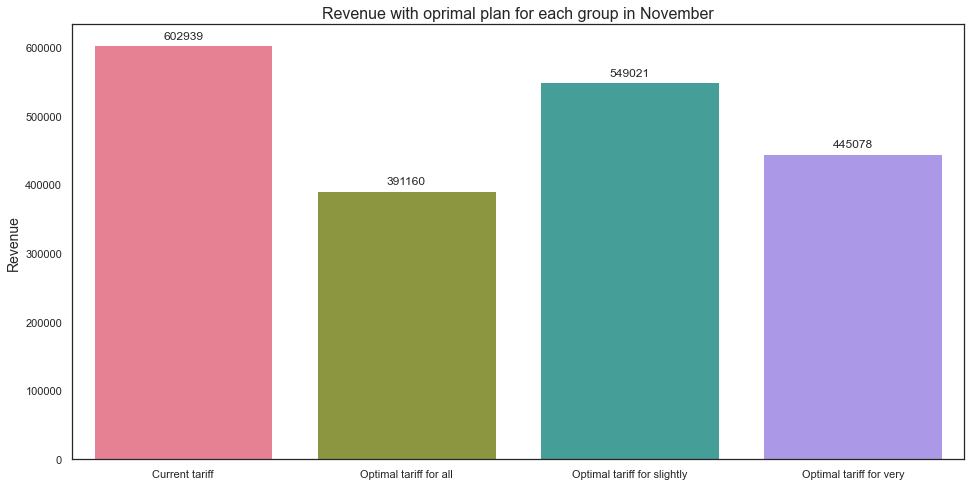

In [131]:
#making a graph
plt.figure(figsize=[16,8])
ax = sns.barplot(x=['Current tariff', 'Optimal tariff for all',
                    'Optimal tariff for slightly',
                    'Optimal tariff for very'],
                 y=[revenue_11, revenue_11_all, revenue_11_sl, revenue_11_ve],
                 data=new_plan_data, palette = 'husl', ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', size=12)
ax.set_title('Revenue with oprimal plan for each group in November', fontsize=16)
ax.set_ylabel('Revenue', fontsize=14)    
plt.show()

As we can see:
- if we switch the tariff plan to optimal for all users: we can get 76.76% less revenue in November;
- if we switch the tariff plan to optimal for clients who overpay slightly: we can get 66.97% less revenue in November;
- if we switch the tariff plan to optimal for clients who overpay very: we can get 72.41% less revenue in November.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter36"></a>

**When is tariff plan become not optimal (depending on call duration in minutes):**
- for clients who talk less than 5001 minutes per month - optimal tariff plan is C;
- for clients who talk more than 5000 minutes per month - optimal tariff plan is B;
- for clients who talk more than 30000 minutes per month - optimal tariff plan is A.

**How many clients with non optimal tariff plan? (in November)**
- Number of clients with non optimal plan: 143, this is 46% of all active users:
    - 110 of them have tariff plan B, this is 98% of all clients with plan B;
    - 33 of them have tariff A, this is 97% of all clients with plan A;
- 57 of clients with non optimal tariff plan have zero call duration in considered month.

**How much clients overpay?**
- 79 clients who overpay very (57 of them with zero call duration in considered month);
- 64 clients who overpay slightly.

**How revenue for the whole period will change if we switch the tariff plan to optimal in November?**
- if we switch the tariff plan to optimal for all users: we can get 13% less revenue;
- if we switch the tariff plan to optimal for clients who overpay slightly: we can get 3.34% less revenue;
- if we switch the tariff plan to optimal for clients who overpay very: we can get 9.78% less revenue.


**How revenue in November will change if we switch the tariff plan to optimal?**
- if we switch the tariff plan to optimal for all users: we can get 35.12% less revenue in November;
- if we switch the tariff plan to optimal for clients who overpay slightly: we can get 8.94% less revenue in November;
- if we switch the tariff plan to optimal for clients who overpay very: we can get 26.18% less revenue in November.

[Back to the Table of Contents](#contents)

### 6. Testing Hypotheses <a class="anchor" id="chapter37"></a>

#### 6.1 Formulating hypotheses <a class="anchor" id="chapter38"></a>

I want to check if the **revenue from clients with current tariff plans and clients with changed tariff plans to optimal differs.**  
 
First I need to formulate hypotheses:  
- H0 - average profit from clients with current tariff plans and clients with changed tariff plans are equal (H0 is always stated with an equal sign);
- H1 - average profit from clients with current tariff plans and clients with changed tariff plans are not equal (according to the task).

I will compare revenue from each of 3 groups of clients with revenue from clients with current plas.

[Back to the Table of Contents](#contents)

#### 6.2 Choosing alpha level and criterion <a class="anchor" id="chapter39"></a>

For testing hypotheses I want to use t-test.  
**Why?**
- t-test a statistic method used to determine if there is a significant difference between the groups based on a sample of data;
- t-test with two samples is commonly used with small sample sizes.  
  
**T-Test conditions and criteria:**
- the populations (where the samples come from) follwo the normal distribution (normality criterion);
- the variances of the populations are also the same (variety criterion).  

In case if both criteria are True - I can use Student's t test for testing hypoteseses;  
In case if we have different variance and normal distribution I can use Welchh's t-test;  
In case if we have not normal distribution I can use The Mann Whitney U testh.  
  
I will check the normality and variance criteria for groups in data set:

To **test for normality**, I will use the **Shapiro-Wilk test.**  
H0- the sample was drawn from a normal (Gaussian) distribution;  
H1- the sample wasn't drawn from a normal distribution.

In [132]:
#testing hypotheses
stat, p = st.shapiro(new_plan_data.revenue)
print('Statistics: {}, p: {}'. format(stat, p))
# interpret
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 0.535412073135376, p: 0.0
We reject the null hypothesis


We can stop here, cause for our main group:
- we have high probability that the data set wasn't drawn from a normal distribution.

To **test for variance**, I will use **the Levene test.**  
H0- the variances of the data set are the same for both groups;  
H1- the variance of the data set are not the same.

In [133]:
#testing hypotheses
stat, p = st.levene(new_plan_data.revenue, new_plan_data.revenue_all)
print('Statistics: {}, p: {}'. format(stat, p))
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 6.293304893533288, p: 0.012183494525833692
We reject the null hypothesis


Clients with current tariff plans and clients with optimal tariff plans:  
Result shows that we have high probability that the data sets's dispersion are not the same for groups.  

In [134]:
#testing hypotheses
stat, p = st.levene(new_plan_data.revenue, new_plan_data.revenue_slightly)
print('Statistics: {}, p: {}'. format(stat, p))
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 0.3904624877306348, p: 0.5321144933141198
We can't reject the null hypothesis


Clients with current tariff plans and clients with optimal tariff plans for those who overpay slightly:  
Result shows that we have high probability that the variances of the data set are the same for both groups.

In [135]:
#testing hypotheses
stat, p = st.levene(new_plan_data.revenue, new_plan_data.revenue_very)
print('Statistics: {}, p: {}'. format(stat, p))
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Statistics: 3.5020206284290976, p: 0.06141289361011172
We can't reject the null hypothesis


Clients with current tariff plans and clients with optimal tariff plans for those who overpay very:  
Result shows that we have high probability that the variances of the data set are the same for both groups.

Based on these results I will choose Mann Whitney test for all comparing.

The alpha level we set relates to the confidence level:  
- 0.05 - 95% confidence level  
- 0.01 - 99% confidence level   

The extent to which the key metrics differ among groups depends on how sensitive the experiments needs to be. 5% is a common criterion.  
Therefore I will take 0.05 alpha level for all tests:

[Back to the Table of Contents](#contents)

#### 6.3 Testing hypotheses <a class="anchor" id="chapter40"></a>

In [136]:
#saving revenues from groups into parameters for future testing
revenue_basic = new_plan_data.revenue
revenue_new_all = new_plan_data.revenue_all
revenue_new_cat1 = new_plan_data.revenue_slightly
revenue_new_cat2 = new_plan_data.revenue_very

Comparing revenue from clients with current tariff plans and from clients with optimal tariff plans:

In [137]:
#testing hypotheses
print("Mann Whitney's U tests result:")
alpha = 0.05

results = mannwhitneyu(revenue_basic, revenue_new_all, alternative='two-sided')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mann Whitney's U tests result:
p-value: 0.006937986984900004
We reject the null hypothesis


Result shows that we have quite high probability that revenue from clients with current tariff plans and revenue from clients with optimal tariff plans are different.

Comparing revenue from clients with current tariff plans and from clients with optimal tariff plans for those who overpay slightly:

In [138]:
#testing hypotheses
print("Mann Whitney's U tests result:")
alpha = 0.05

results = mannwhitneyu(revenue_basic, revenue_new_cat1, alternative='two-sided')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mann Whitney's U tests result:
p-value: 0.3500776804882382
We can't reject the null hypothesis


Result shows that we have high probability that revenue from clients with current tariff plans and revenue from clients with optimal tariff plans for those who overpay slightly are equal.

Comparing revenue from clients with current tariff plans and from clients with optimal tariff plans for those who overpay very:

In [139]:
#testing hypotheses
print("Mann Whitney's U tests result:")
alpha = 0.05

results = mannwhitneyu(revenue_basic, revenue_new_cat2, alternative='two-sided')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Mann Whitney's U tests result:
p-value: 0.07754121726376155
We can't reject the null hypothesis


Result shows that we have high probability that revenue from clients with current tariff plans and revenue from clients with optimal tariff plans for those who overpay very are equal.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter44"></a>

During analysis:
- we found clients with non optimal tariff plan and we changed tariff plan for all or for categories of clients to optimal; 
- we caclulated revenue from each groups with changed plans and compared it with current revenue;
- we tested hypotheses to find probability that received revenue from clients with optimal plans are equal/differs from current revenue.

(all the numbers in the previous [conclusion](#chapter36))

**How we can use our results?** 

We understand that company will lose money in each cases if we change tariff plan to optimal for all clients or for one of categories of clients with non optimal tariff.  
Company can lose form 67-77% of revenue in the next month from considered users if we decide to change their plans to optimal (for all or for part of users).  
But since we have each month around 200 new users total loss can be 3-13% of revenue if we decide to change plan for considered clients only.  
(more details in the numbers in the previous [conclusion](#chapter36))  

After testing hypothesis I can say that that if we change tariff plan for one of category of clients we hhave much less lose, it's good option if we want to find balance between kepping clients and decreasing lose in revenue.

I recommend to pay attention to the group `overpay very` with clients who overpay a lot.  
In this group we have clients with zero call duration here in current month and as was told this mysterious clients (cause we don't know the reason why they stooped do outgoing calls) can leave us first when get more profitable suggestion form another company. Probably this clients going to leave us and in this case we can try to hold them with new suggestion or if they leave anyway we will revenue with smaller lose than was predicted.  
For other clients in this group who do outgoing calls and overpay a lot for their tariff plan our suggestion to change plan will be so actual and we have a chance to get very loyal clients.

Anyway we need to choose or lose in revenue or decreasing probability to lose client with non optimal tariff by suggesting him change plan to optimal.

---

Also I can recommend to company to create algorithm that will automatically detected clients with non optimal plan (each quarter for example), splitted clients to categories and decide who we need to suggest to switch the tariff plan.

[Back to the Table of Contents](#contents)

### 7. Presentation <a class="anchor" id="chapter41"></a>

link: https://drive.google.com/file/d/1B-1NTFp7EwaCz7oBunzppddLDL6P-dSU/view?usp=sharing

[Back to the Table of Contents](#contents)

### 8. Dashboard <a class="anchor" id="chapter42"></a>

link: https://public.tableau.com/profile/sofiya6834#!/vizhome/DashboardFinalProject_16091966083510/Dashboard?publish=yes

[Back to the Table of Contents](#contents)